# Navigating the World of Warcraft Forums: An Analytical Journey

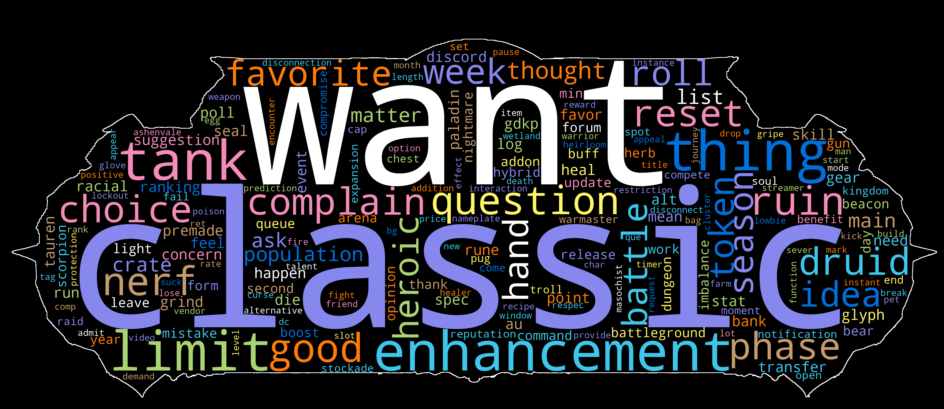

Welcome to our exploration of the World of Warcraft (WoW) forums, a nexus for one of the most vibrant gaming communities. As a long time, player I'm eager to guide you through the intricacies of player dialogues, employing traditional and imaginative natural language processing (NLP) techniques to navigate the expanse of conversations that define this community. This voyage seeks to uncover the underlying themes and sentiments that vivify the WoW forums. Beyond leveraging the established Term Frequency-Inverse Document Frequency (TF-IDF) analysis to highlight dominant topics and trends, we're venturing into new territories. Focusing on WoW Classic's Season of Discovery, striving to track the evolution of community expressions, pinpointing how specific phrases and terms resonate or fade over time. This endeavor will deepen our understanding of how conversations evolve in response to the game and its community developments.
A unique twist on our quest is the introduction of a spell checker-based method that enables us to identify acronyms and jargon. This specialized language forms the secret code of the WoW community. By employing this technique we are not only **<span style = 'color:#ff8000'>parsing</span>** through standard vocabulary but exposing the hidden lexicon that often goes unnoticed, revealing the acronyms and phrases that are pivotal for in-depth community insights.

Furthermore, this investigation delves into the realm of sentiment analysis. By examining the layers embedded in forum posts we aspire to chart the shifting sentiments across different game aspects and to understand the community's collective emotions. Equipped with a range of tools, including TF-IDF, VADER for sentiment analysis, and leveraging a spell-checker for identifying jargon, we are ready to dive into the dynamic conversations that take place on the World of Warcraft forums. Let's buff up and embark on this analytical journey to uncover the main topics of discussion, evaluate the prevailing opinions, and discover the unique language that distinguishes the WoW community as truly one-of-a-kind!

*Note: Due to its proximity to the present date, limited data is available for the latest patch. Therefore, this analysis focuses primarily on the initial launch of Season of Discovery*


<h2>Background on <span style="color: #DAA520; 
             font-weight: bold; 
             text-shadow: 
             1px 1px 0px #000, 
             -1px -1px 0 #000, 
             -1px 1px 0 #000, 
             1px -1px 0 #000,
             2px 2px 0px #0e3eda, 
             -2px -2px 0 #0e3eda, 
             -2px 2px 0 #0e3eda, 
             2px -2px 0 #0e3eda,
             3px 3px 0px #641d7d, 
             -3px -3px 0 #641d7d, 
             -3px 3px 0 #641d7d, 
             3px -3px 0 #641d7d;">World of Warcraft</span></h2>




World of Warcraft (WoW), developed by **<span style="color:#00ccff ;text-shadow: -0.1px -0.1px 0 #000, 0.1px -0.1px 0 #000, -0.1px 0.1px 0 #000, 0.1px 0.1px 0 #000;">Blizzard Entertainment</span>**, has been a cornerstone of the MMORPG genre since its release in 2004. In Azeroth's vast, lore-rich world, WoW invites players to embark on epic quests, face formidable foes, and forge alliances, all within an immersive fantasy setting.
Throughout its history, WoW has introduced a series of expansion packs, each opening new realms for exploration, offering quests, and advancing Azeroth's narrative. These expansions have played a key role in keeping the game lively and engaging, ensuring the Warcraft universe remains a dynamic and enthralling space for a diverse and dedicated player base. The game's sustained popularity has significantly impacted the gaming industry and permeated popular culture, influencing various forms of media and entertainment.

Acknowledging the community's longing for the original WoW experience, Blizzard introduced WoW Classic, a faithful recreation of the game as it was at launch. The community warmly received this move, which sought to capture the nostalgic essence of WoW's early days. Following the success of WoW Classic, Blizzard has continued to explore the concept of nostalgia by releasing subsequent expansions and seasonal versions, such as the Season of Mastery and Season of Discovery, offering players variations of the original content with specific updates and community-driven changes.
An extension of this nostalgic trip is the introduction of WoW Classic Hardcore. These variant challenges player to experience WoW under self-imposed rules that significantly raise the stakes of gameplay, such as the ultimate penalty of character deletion upon death. WoW Classic Hardcore has sparked a vibrant sub-community dedicated to mastering WoW in its most unforgiving form, adding an exhilarating dimension to the classic experience.
Meanwhile, the retail version of WoW forges ahead, introducing new expansions and updates that enrich the game world and its ever-evolving story. This progress ensures that the adventure in <a href = "https://wowpedia.fandom.com/wiki/Azeroth">Azeroth</a> continues growing, offering its inhabitants fresh experiences.

The existence of WoW Classic, its Hardcore variant, seasonal iterations, and the retail version highlights Blizzard's commitment to preserving the game's legacy while also pushing the boundaries of its future. This multifaceted approach reflects WoW's unique status in gaming history— a game that honors its past while continually evolving, firmly establishing itself as a living, breathing entity in the cultural zeitgeist and the hearts of players.



## Data Overview
The cornerstone of our exploration is a comprehensive dataset scraped from the <a href = "https://us.forums.blizzard.com/en/wow/c/wow-classic/197">WoW Classic forums</a>. This dataset serves as a window into the spirited community that has grown around WoW Classic, offering a view of player interactions, discussions, and the evolving lexicon of the game.

**Dataset**: For those interested in diving deeper into the specifics of this dataset, including its structure and content it encompasses, I invite you to visit the [dataset page on Kaggle](https://www.kaggle.com/datasets/jesterhead/wow-classic-gamer-jargon-and-terms-dataset). Here, you'll find detailed documentation and insights into the data compilation process, ensuring a comprehensive understanding of the dataset's foundation and potential applications.

**Highlights**: This dataset is a treasure trove of information, capturing various discussions, topics, and comments from the WoW Classic forums. It provides a resounding mosaic of the community's dialogue, reflecting not just the game's mechanics and updates but also the social dynamics, player experiences, and collective memory of the WoW Classic player base. Through this dataset, we gain access to the heartbeat of the WoW Classic community, offering a unique opportunity to analyze trends, sentiments, and the linguistic nuances that define this passionate group of gamers.

## Setting Up the Environment

Our analysis relies on several Python libraries, each serving a unique role in processing and analyzing the dataset.

In [3]:
# Standard libraries
import random
import re
import string
import warnings

# Data processing and numerical operations
import numpy as np
import pandas as pd

# Text processing and NLP
import contractions
import emoji
import ftfy
import nltk
import spacy
import textstat
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from spellchecker import SpellChecker

# Visualization
from IPython.display import display, HTML
from matplotlib import pyplot as plt
from PIL import Image
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Local imports
from notebook_config import CustomizePlot, ITEM_QUALITY_COLORS, CLASS_COLORS, WOTLK_BAR_COLORS, CLASSIC_COLORS,HARDCORE_WOW

# Configuration and setup
nltk.download('punkt', quiet=True)
warnings.filterwarnings("ignore")
nltk.download('averaged_perceptron_tagger',quiet=True)
nltk.download('vader_lexicon',quiet=True)

spacy_nlp = spacy.load('en_core_web_lg')
spacy_stopwords = spacy_nlp.Defaults.stop_words

# Increase the column width for better pandas DataFrame readability
pd.set_option('display.max_colwidth', None)

## Loading and Inspecting the Data

In [4]:
df = pd.read_csv('all_posts_2023.csv')
df.head()

,topic,forum,text_segments,quotes,likes,date,text
0,Nerf needed- shadow priest and rogues,Season of Discovery,['Shadow priests are one shotting geared toons in arathi basin and rogues are too; needs to be looked into asap and nerfed'],[],0,2024-02-13 16:36:42+00:00,Shadow priests are one shotting geared toons in arathi basin and rogues are too; needs to be looked into asap and nerfed
1,Need Dual Spec Now,Season of Discovery,"['I want Dual Spec but definitely not mid raid.', 'Restrict it to rested zones or as a dialogue option at the trainer.', '\n“I’d like to use my alternate specialization”']",[],0,2024-02-13 16:32:03+00:00,"I want Dual Spec but definitely not mid raid. Restrict it to rested zones or as a dialogue option at the trainer. \n""I'd like to use my alternate specialization"""
2,Need Dual Spec Now,Season of Discovery,"['We need this now and not later. There’s too many things that require fluidity with your roles. Tank, DPS, Healing, PVP. Even Gnomer demands different roles based on the fights. Blizzard not giving this to us now is the biggest failure of SoD.']",[],0,2024-02-13 16:32:03+00:00,"We need this now and not later. There's too many things that require fluidity with your roles. Tank, DPS, Healing, PVP. Even Gnomer demands different roles based on the fights. Blizzard not giving this to us now is the biggest failure of SoD."
3,How to Cataclysm,Wrath of the Lich King Classic Discussion,"['Never played Cata OG. For WotLKC launch was T6 geared and had the guild 5-man heroic teams all planned out. Might as well take a couple days off work and do the same thing for Cata launch.', '\nI never liked the smell of roses anyway.', '\nQuestions:', 'For 80-85 is it faster to dungeon spam or open world quest? Leaning towards dungeons. Is the 80-85 open world fleshed out?', 'For both TBC and WotLK, I felt the “level 62/72 greens will replace all your epics” was over-exaggerated. I assume mostly-BiS lvl80 gear is just fine for Cata heroic dungeons, but what about the first raids? There are reputations to farm at 85 right? So I assume I would have a mix of ICC gear and some 85 blues going into phase 1 raids. Thoughts?', 'Can anyone point me in the direction of a wowhead-analog for Cata as-it-was? So I can answer my own questions about the zones, leveling path, dungeon progression, etc.', 'Thanks fellow gamers. ']",[],0,2024-02-13 16:29:42+00:00,"Never played Cata OG. For WotLKC launch was T6 geared and had the guild 5-man heroic teams all planned out. Might as well take a couple days off work and do the same thing for Cata launch. \nI never liked the smell of roses anyway. \nQuestions: For 80-85 is it faster to dungeon spam or open world quest? Leaning towards dungeons. Is the 80-85 open world fleshed out? For both TBC and WotLK, I felt the ""level 62/72 greens will replace all your epics"" was over-exaggerated. I assume mostly-BiS lvl80 gear is just fine for Cata heroic dungeons, but what about the first raids? There are reputations to farm at 85 right? So I assume I would have a mix of ICC gear and some 85 blues going into phase 1 raids. Thoughts? Can anyone point me in the direction of a wowhead-analog for Cata as-it-was? So I can answer my own questions about the zones, leveling path, dungeon progression, etc. Thanks fellow gamers."
4,So what did Aggrend reroll to?,Season of Discovery,['Start of SoD? Yes. What about right now?'],[],0,2024-02-13 16:22:19+00:00,Start of SoD? Yes. What about right now?


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240254 entries, 0 to 240253
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   topic          240254 non-null  object
 1   forum          240254 non-null  object
 2   text_segments  240254 non-null  object
 3   quotes         240254 non-null  object
 4   likes          240254 non-null  object
 5   date           240254 non-null  object
 6   text           240254 non-null  object
dtypes: object(7)
memory usage: 12.8+ MB


In our quest to uncover deeper insights from the WoW Classic forums, we turn our attention to the linguistic structure of the posts. Understanding the readability and complexity of forum discussions can provide valuable perspectives on how accessible the content is to a broad audience and the level of sophistication in the language used by the community. To this end, we employ several metrics that serve as proxies for these linguistic features. Using the textstat library, we calculate the following metrics for each post in our dataset:

* **Syllable Count**: The total number of syllables in the post, giving us an idea of word complexity.
* **Lexicon Count**: The count of unique words, indicating the diversity of vocabulary.
* **Sentence Count**: The number of sentences, which helps in understanding the structure of posts.
* **Flesch Reading Ease**: A score that rates texts on a 100-point scale for their readability. Higher scores indicate material that is easier to read; lower scores point to more complex texts.

By computing these metrics, we aim to paint a picture of the textual characteristics present in forum discussions. Additionally, we calculate the average values for each metric across all posts, providing us with a bird's-eye view of the overall linguistics of the WoW Classic forums.


In [6]:
df['syllable_count'] = df['text'].apply(textstat.syllable_count)

In [7]:
df['lexicon_count'] = df['text'].apply(textstat.lexicon_count)

In [8]:
df['sentence_count'] = df['text'].apply(textstat.sentence_count)

In [9]:
df['flesch_reading_ease'] = df['text'].apply(textstat.flesch_reading_ease)

In [10]:
average_syllable_count = df['syllable_count'].mean().round(1)
average_lexicon_count = df['lexicon_count'].mean().round(1)
average_sentence_count = df['sentence_count'].mean().round(1)
average_flesch_reading_ease = df['flesch_reading_ease'].mean().round(1)

In [11]:
print(f"Average Number of Sentences: {average_sentence_count}")
print(f"Average Number of Words: {average_lexicon_count}")
print(f"Average Number of Syllables: {average_syllable_count}")
print(f"Average Flesch Reading Ease: {average_flesch_reading_ease}")

Average Number of Sentences: 3.1
Average Number of Words: 45.8
Average Number of Syllables: 60.3
Average Flesch Reading Ease: 81.3


Let's break down the stats to see what they tell us about the forum posts:

- **Average Number of Sentences (3.1)**: Forum contributions tend to be concise, with most thoughts expressed in just over three sentences. The WoW community prefers quick quests over long chains when it comes to sharing thoughts.
- **Average Number of Words (45.8)**: Each post strikes a balance with nearly 46 words on average—succinct enough for clarity yet comprehensive for detail. It reflects the community's knack for min-maxing not just in gameplay but in communication, optimizing the impact of every word.
- **Average Number of Syllables (60.3)**: The syllable count suggests that while the language used is accessible, it doesn't shy away from the occasional complexity—much like a solid raid strategy.
- **Average Flesch Reading Ease (81.3)**: Despite a high readability score suggesting posts are generally straightforward, this figure doesn't fully capture the specialized jargon endemic to WoW's community. 


While the prose might flow in plain English, the lexicon is rich with game-specific shorthand, making it a cozy inn for veterans but a **<span style="color:#1E5932; text-shadow: -.2px .2px 0 #7C683D, .2px -.2px 0 #34200E;"><a href='https://www.wowhead.com/classic/zone=718/wailing-caverns' style="text-decoration: underline; color: #1E5932;">Wailing Cavern</a></span>** for newcomers.

These insights illustrate a community that values directness with a dash of complexity—reflecting the diversity of players that make up the World of Warcraft forums.


## Outliers: A Deep Dive into Word Lengths

As we navigate the intricate communication threads within the forums, our joyous journey takes an unexpected turn toward the statistical sea of word lengths. Outliers in data can often tell stories as compelling as the central tendencies. In this case, our quest for understanding extends beyond average linguistic features to the outliers that defy conventional expectations. Why focus on these statistical anomalies?
Outliers, particularly in word lengths, serve as beacons illuminating unique linguistic phenomena characteristic of the WoW community.


**Function Overview:** `word_lengths`

The `word_lengths` function starts by tokenizing the text into individual words using the `word_tokenize` method, ensuring every word is considered. However, recognizing that punctuation can skew the perception of word lengths, the function filters out any tokens that aren't purely alphabetical. This purification step ensures the focus is solely on words, providing a clearer view of the linguistic landscape of the forums.

In [12]:
# Function to calculate word lengths in a document
def word_lengths(text):
    # Remove URLs as they are not relevant to our analysis
    text = re.sub(r'http\S+', ' ', text)
    # Tokenize the text into words
    words = word_tokenize(text)  
    # Return word lengths, exclude punctuation
    return [len(word) for word in words if word.isalpha()]

In [13]:
# Apply the function to each document and store the word lengths in a list
all_word_lengths = df['text'].apply(
    word_lengths).explode().dropna().astype(int)

In [14]:
word_length_counts = all_word_lengths.value_counts().reset_index()
word_length_counts.columns = ['word_length', 'count']

**Bar Chart Visualization**

The bar chart below illustrates the distribution of word lengths in forum documents. Class colors are used as the color palette to add an authentic WoW touch to the analysis, bridging the gap between data science and game lore.

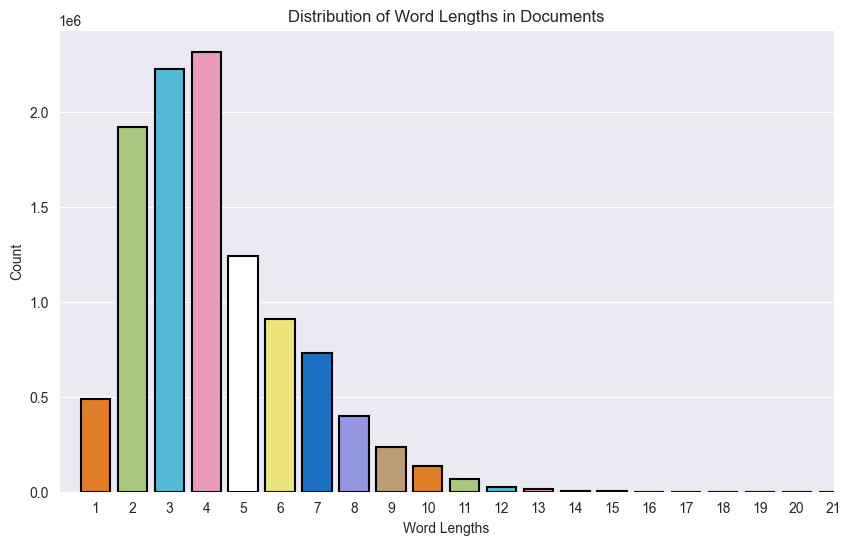

In [15]:
# Create a bar graph of word lengths
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))

sns.barplot(x='word_length',y='count', data=word_length_counts, linewidth=1.5, edgecolor='black',palette=list(CLASS_COLORS.values())[1:])
plt.xlim(-1, 20)
plt.title('Distribution of Word Lengths in Documents')
plt.xticks(range(0, 21))
plt.xlabel('Word Lengths')
plt.ylabel('Count')
plt.show()

**Boxplot Visualization**

To complement this analysis, a boxplot illustrates the spread and distribution of word lengths. The boxplot summarizes word lengths, demonstrating the central tendency and variability within the discussions and visually representing the data's distribution.

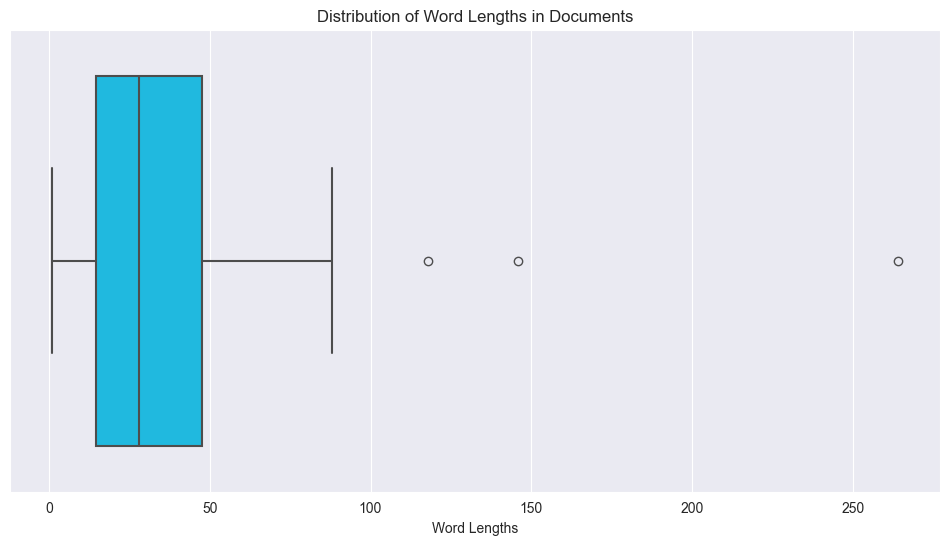

In [16]:
# Create a boxplot of word lengths
plt.figure(figsize=(12, 6))
sns.boxplot(x = word_length_counts['word_length'],
            color=ITEM_QUALITY_COLORS['Heirloom'], linewidth=1.5)

plt.title('Distribution of Word Lengths in Documents')
plt.xlabel('Word Lengths')
plt.show()

The next code snippet is designed to analyze the lengths of words within a collection of texts (e.g., forum posts) and identify outliers in word lengths. Here's a step-by-step breakdown of what each part of the code does:

- **Extract Texts:** It starts by converting the `text` column of a DataFrame df into a list. This list of texts contains all the textual data that will be analyzed.

- **Tokenization and Length Calculation:** The code then tokenizes each text into individual words using a nested list comprehension. It flattens this list of lists into a single list of words, words, by iterating over each text in the texts and each word in each text. It calculates each word's length (number of characters) and stores them in the array `word_lengths`.

- **Interquartile Range (IQR) Calculation:** The interquartile range (IQR) is computed as the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the word lengths. This statistical measure determines the spread of the middle 50% of the data and helps identify outliers.

- **Defining Outliers:** Outliers are defined based on the IQR. The lower bound for outliers is calculated as Q1 minus 1.5 times the IQR, and the upper bound is Q3 plus 1.5 times the IQR. Words with lengths outside these bounds are considered outliers.

- **Identifying Outlier Words:** The code then filters words to find those whose lengths fall outside the defined lower and upper bounds, categorizing them as `outlier_words`. It calculates what percentage of all words these outliers represent (`outlier_percent`) and determines the number of unique outlier words (`unique_outlier`), as well as the percentage of unique outliers relative to all unique words (`unique_percent`).

In [17]:
texts = df['text'].tolist()
# Tokenize and get lengths
words = [word for text in texts for word in word_tokenize(text)]
word_lengths = np.array([len(word) for word in words])

# Calculate IQR and define outliers
Q1 = np.percentile(word_lengths, 25)
Q3 = np.percentile(word_lengths, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outlier words
outlier_words = [word for word in words if len(
    word) < lower_bound or len(word) > upper_bound]
outlier_percent = round(len(outlier_words)/len(words)*100, 1)
unique_outlier = len(set(outlier_words))
unique_percent = round(unique_outlier/len(set(words))*100, 1)

In [18]:
print(f'Upper Bound: {int(np.floor(upper_bound))}\nNumber of Outlier Words: {len(outlier_words)} ({outlier_percent}%)\nNumber of Unique Outlier Words: {unique_outlier} ({unique_percent}%)')

Upper Bound: 9
Number of Outlier Words: 286645 (2.3%)
Number of Unique Outlier Words: 36459 (27.8%)


- **Upper Bound for Word Lengths:** Setting the upper bound at 9 characters helps us identify outlier words—those exceeding this length—as <span style="color:#1eff00; text-shadow: -0.3px -0.3px 0 #000, 0.3px -0.3px 0 #000, -0.3px 0.3px 0 #000, 0.3px 0.3px 0 #000;">uncommon</span>.
- **Prevalence of Longer Words:** With 286,728 words classified as outliers, accounting for 2.3% of the entire word count, the dataset showcases a notable presence of longer terms. This is unusual, as standard English typically features shorter average word lengths.
- **Variety Among Outliers:** The diversity within these outliers is remarkable, with 36,528 unique terms representing 27.7% of all unique words in the dataset. This variety suggests the text encompasses a broad spectrum of longer words rather than repeatedly using a limited set.

Let's explore these numerical anomalies and see if we can decipher why our esteemed WoW community might just be crafting the next great English <span style="color:#a335ee ;text-shadow: -0.3px -0.3px 0 #000, 0.3px -0.3px 0 #000, -0.3px 0.3px 0 #000, 0.1px 0.1px 0 #000;">Epic</span> ... or just really likes hyphens.

## Hyphenated Terms in WoW Text Data

You might wonder why I analyzed word lengths before doing a thorough text cleanup. Well, I did initially clean the data in a previous iteration. That's where I stumbled across a curious collection of absurdly long words.
The discovery prompted a moment of reflection and investigation. "Did I mess something up?"

As it turns out, the anomaly wasn't a mistake but a revelation. I uncovered a distinct communication style—hyphenated terms that had lost punctuation in the preprocessing phase.

Let's take a closer look at this phenomenon. I'll highlight the hyphenated terms in **<span style="color:red ;text-shadow: -0.1px -0.1px 0 #000, 0.1px -0.1px 0 #000, -0.1px 0.1px 0 #000, 0.1px 0.1px 0 #000;">red</span>** to give you a sense of the "creative punctuation" we gamers favor.


In [19]:
df_styled = df[['text', 'topic']]
# Apply the function to the DataFrame
df_styled = df_styled.applymap(CustomizePlot.hyphen_highlight)

hyphenated_pattern = r'\b\w+(?:-\w+)+\b'

df_styled = df_styled[df_styled['text'].str.contains(hyphenated_pattern)]
# Display the DataFrame as HTML in Jupyter Notebook
display(HTML(df_styled.sample(10, random_state=27).to_html(escape=False)))

,text,topic
68428,"Having kill command only work with claw and bite actually hurts the dps of any pet that uses claw. \nThe reasoning is that claw has no cooldown and since the buff decreaes the amount of buff by 20% every hit, you have the buff 4-5 secs at most depending on pet focus amount. However, if only used on bite, bite has an 8 second cooldown seconds and therefore the active buff timer is by at least 18-20 secs depending. \nso by that reckoning is not really viable on any pet that does a claw attack. \nchange it to only buff special attacks which, by design, usually has much longer cool downs. Just an idea. Thanks.",Kill Command with claw attack was bad idea
149740,"Crazy that they say it's working as intended. The Spy-bot is standing right next to him and when you talk to him, he beleives the spy-bot is in disguise and luring out the people from the library. It's definitely bugged. I've never had this issue until HC…",Enough is enough - Tyrion is NOT working as intended
172589,I mean if you want the meme specs we have on era to have some play you would need something else. It would most likely be some changes made to a plus version or a pre-tbc version of classic and the tbc talents were great at giving more damage and utility to the meme specs.,Some classic plus small class changes I would like to see:
105683,Is this a true-to-Wrath quirk? Or did the intern devs strike again,Add the 238 Honor sets in Dalaran
218247,"DK bots are just AI beta testing grounds for retail, and once ready they'll be re-released into the skynetz.",Conspiracy Theory - DK Bot EXPOSED
94681,"The problem is that Hunter feels like Vanilla after nerfs. No SOD spice. I don't think the devs want to balance Hunters around having runes and change Hunters in Vanilla, but what if the runes did that… For example: \nChimera Shot could go back to 125% weapon damage and be a powerful shot (feels good), but maybe add a -10-20% (whatever it takes to balance) damage debuff on auto shot when the rune is equipped. Reducing auto shot damage on the rune creates a balance with other classes and creates a fun press ability on the Hunter to make them feel different and new. I think too much of Hunter damage comes from auto shot and pet melee attacks (no button presses, just constant ""boring"" damage) and reducing those amounts through the Runes allows you to balance each Rune more easily. Just a thought.",Hunter in SOD - A Different Route
143018,unwise development decisions. gate keepers for classic wow arent allowed to say this. ur version of the game is the worst in every aspect besides the 1-60 old grindy feeling. And at that point it will be another version of retail thats will be better than ur era servers :^),What is the reason you can faction change in classic?
144470,Twenty-year-old game and people are still spelling rouge wrong. No it's Rogue,Rogue Games!
232020,"FF14 is letting people just walk onto another server to go play with other people and make new friends if they feel like it. Cross-realm gameplay has been a thing in current WoW for quite a while. Someone can be invited into a group by someone from another server and be instantly phased to that server. And then of course there's cross-realm dungeons and raids. Classic is antiquated when it comes to servers simply because it's Classic. It's how the game was back in the day,",Skyfury needs help
109420,"Title. I know for a fact that the ToGC horses from the achievements will become unavailable after 4.0.3 since they are related to ""no wipe/death runs"" achievements, just like the zul'aman Bear that became unavailable in 3.0.2. But what's the status with the Naxx Proto-drakes overall? Also, since they added a NPC to still allow players to access classic Onyxia, are they also doing the same to keep old Zul'Gurub accessible in Cata?",Are the Naxx Proto-drakes going way with Cata classic? What about Zul'Gurub?


In [20]:
print(
    f'Number of Unique Hyphenated Words: {len(set(re.findall(hyphenated_pattern," ".join(words))))}')

Number of Unique Hyphenated Words: 10357


Regarding MMORPGs, players often min-max their way through language just as they do in-game strategies, leading to the crafting of long, hyphenated terms. Here, hyphens combine terms to convey maximum meaning with minimal confusion, showcasing the community's mastery of efficiency.

## The Role of Forward Slashes (/)  
<hr/>
In WoW, players carefully curate their gear and abilities for optimal performance, a practice reflecting the game's strategic depth. This optimization concept extends beyond the confines of gameplay into how players communicate. Just as hyphens serve to weave complex terms together, drawing parallels to in-game strategy and character optimization, forward slashes emerge as another pivotal element in the gamers' toolkit.

In [21]:
df_styled = df[['text', 'topic']].applymap(
    CustomizePlot.hyphen_slash_highlight)

slash_pattern = r'\b\w+(?:/\w+)+\b'

df_styled = df_styled[df_styled['text'].str.contains(slash_pattern)]

# Display the DataFrame as HTML
display(HTML(df_styled.sample(10, random_state=27).to_html(escape=False)))

,text,topic
9027,Dungeons can't be contested. But the entrances can. Hope Ally have fun trying to get into SM or RFK/D. We'll erect a statue out of your skeletons.,Phase 2 & You
33506,"Honestly it really is plenty viable. I've been full survival since day 1, sitting around at 2.2k HP buffed most people just see hunter and assume if they get close its cinched, then they eat 600/800 damage burst from Raptor/Flanking, and have a hard time hitting though deterrence which pushes me up to 55% dodge. Losing the stam from trident hurts me slightly, but this huge top end on Hydra makes for some fun surprise burst against people that get cocky.","Attention, I, a hunter, have an announcement"
74432,"literally just slow it, and that 16/0/0 hunter will melt People would rather whine hunter pet to strong me no know how cc slow pet you have an entire talent tree and multiple runes dedicated to making your pet super strong Yup you sacrifice your damage to beef up your pet instead of using the mm talents that make the hunter strong same for the rune you use the BM rune to make pet strong but not your damage but that's to hard to understand for some poeple. Why do forums posters have to cry about a fun class build and playstyle Hunters get only one playstyle aka lion aura and trueshot aura to buff warrior,rogue,feral druid and ret paladin that what they wan't hunters to do so the same old mm spec…no good BM spec for a optional spec sadly.",Do people not understand BM hunter?
34465,do you even have 5/5 cataclysm,Lake of Fire should reduce mana cost of Rain of Fire by 90%
59633,"Honor/Rank decay is bad, and you should feel bad for suggesting it.",Positive and Useful Suggestions for SOD
722,"Can we look into providing druids with some meaningful mana return options? You are now forcing the class toward Starfire which will cause is to oom. Can we also look into giving Moonkin form some additional utility/defensive boon? Now that we hit like a wet noodle, maybe we can entertain the idea of making druid more utility heavy/thicker as a class? Because make no mistakes about it, putting the utility of this spell on Starfire is a MASSIVE pvp nerf. Or, could we fix the Eclipse rune since we are now hard casting way more regularly and suffering more pushback? Or, make lifebloom useful or castable in Moonkin form? Also, remove the Starfire effect that happens on your character. It not only reveals our position, but it looks like we are getting starsurged by another druid. I don't know…just… something now that our only worthwhile rune has been Gutted.",Now that Starsurge has been Gutted
201843,"So I have returned to WoW after a couple years of break. Got back into Retail and must say I don't like the level Squish. That is probably my biggest issue with retail atm, altho I previously left from WoW burn out. \nI have recently returned to play Classic and I'm enjoying it again like I did back in the day of the first 3 expansions. There are varying opinions regarding WotLK and on each expansion regarding what's good and what's bad and where it should end (Classic Saga). \nI personally loved the first 3 expansions and I loved Panda expansion, to me that was the best expansion of all of them even the ones after that. I would love to see a Panda Classic server created, separate from the others where I could level up fresh toons from level 1 all the way up to 100 with all the Panda trimmings of course. Personally, I'd stop there with that expansion altho others will want more and that's fine. I might even play a little on those servers too. But Panda will be my home server. \nI would skip the Cata classic server and just go straight to a Panda server or release both at same time. Now I know people will say you have to have Cata first for technical reasons and that's fine but I disliked Cata and would end up waiting until the panda server came out before I moved my toons. I just think that if the numbers are there for cata then go straight to a Cata/Panda Server and 

In [22]:
print(f'Number of Unique Slash Seperated Words: {len(set(re.findall(slash_pattern," ".join(words))))}')

Number of Unique Slash Seperated Words: 13450


During the text walkthrough, we see numerous words highlighted in **<span style="color:#0070dd; text-shadow: -.3px -.3px 0 #FFD700, .3px -.3px 0 #FFD700, -.3px .3px 0 #FFD700, .3px .3px 0 #FFD700;">blue</span>** that are tied to WoW/gaming. Notice the use of the slash there? While it might come off as significant like the hyphen, from a data standpoint, the slash serves as a logical "or" in English and doesn't add value to our analysis.

## The Impact of the Plus Sign (+)
<hr/>
For this next part, let's discuss the "+" sign and its considerable impact. Early on, when I was tidying up our data, a seemingly inconsequential decision—to remove symbols like "+," "-," and "/"—unveiled an intriguing anomaly. "Classic" had an unusually high TF-IDF score among the terms analyzed. You might think, "Well, of course, it's the Classic forums." But this wasn't just a frequent mention—it was a statistical standout, suggesting something more than casual references. 

That "something more" turned out to be discussions around "Classic Plus" or "Classic+." Classic+ is envisioned as an enhanced form of the original Vanilla WoW, featuring content that didn't make it into the game's first iteration. The "+" turned out to be vital; we were missing out on a significant layer of community aspiration without it. In the world of data and Warcraft, minor details can sometimes have the most significant impact.

<hr/>


After exposing the layers behind terms like 'Classic+' and understanding the community's lingo, it's time to refine our data-cleaning process.

The `clean_text` function is designed to preprocess text data by performing several cleaning operations:

- **Fix Text Encoding:** Uses `ftfy.fix_text` to correct encoding issues, ensuring characters display correctly.
- **Replace Newlines and Tabs:** Converts newline, carriage return, and tab characters to spaces for consistent formatting.
- **Modify "+" Symbols:** Changes "+" to "-plus" to preserve semantic meaning in phrases like "Level 20+".
- **Remove Block Quotes:** Eliminates forum block quotes to focus on the primary text content.
- **Expand Contractions:** Uses the contractions library to expand shortened forms (e.g., "don't" to "do not") for clarity.
- **Strip Punctuation:** Removes sequences of punctuation marks, except hyphens, to reduce textual noise.
- **Remove URLs:** Excludes web addresses, which are typically irrelevant to text analysis.
- **Normalize Whitespace:** Reduces multiple spaces to one space and trims space from the text's beginning and end.
  
This function streamlines the text, making it cleaner and more uniform for analysis or processing in NLP tasks.


In [23]:
def clean_text(text):
    # Fix text encoding issues
    text = ftfy.fix_text(text)

    # Replace newline, carriage return, and tab characters with a space
    text = re.sub(r'[\n\r\t]', ' ', text)

    # Replace "+" with "-plus", retaining the word before "+"
    text = re.sub(r'(\w+)\+', r'\1-plus', text)

    # Remove block quotes
    text = re.sub(r'\[quote=".*?"\]', ' ', text)

    # Replace contractions with their expansions
    text = contractions.fix(text)

    # Remove sequences of punctuation (excluding hyphens)
    punctuation_to_remove = string.punctuation.replace(
        "-", "")

    text = re.sub(f"[{punctuation_to_remove}]+", " ", text)

    # Remove URLs as they are not relevant to our analysis
    text = re.sub(r'http\S+', ' ', text)

    # Normalize whitespace to a single space and trim leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [24]:
# Applying the function to DataFrame columns
df['clean_text'] = df['text'].apply(clean_text)
df['clean_topic'] = df['topic'].apply(clean_text)

## Navigating Numbers in Azeroth's Lexicon

In data cleaning, numerical values often undergo standardization or renaming for clarity. Yet, in the gaming universe of World of Warcraft, numbers carry layers of meaning far beyond their face value. Consider the expressions "20+" and "35+." To the uninitiated, these might appear as simple numerical increments. Yet, to those who traverse the realms of Azeroth, these numbers are laden with significance. They're imbued with context that varies between retail and classic versions of the game. In retail, "20+" might hint at a  <span><a href="https://www.wowhead.com/item=138019/mythic-keystone" style="color:#a335ee;text-shadow: -0.1px -0.1px 0 #000, 0.1px -0.1px 0 #000, -0.1px 0.1px 0 #000, 0.1px 0.1px 0 #000;">Mythic Keystone</a></span>
 dungeon level, while it could signify a player's level in Classic. Moreover, the number 20 is symbolic, representing the required headcount for a raid, underscoring its significance in communal achievements. The challenge is to navigate these numbers not as mere data points but as symbols enriched with contextual depth.

Considering this, I'll refine the dataset by removing simple digit-to-digit patterns and transforming abbreviations.
<hr/>

The `clean_numbers` function is designed to preprocess specific pandas `DataFrame` columns to standardize gaming-related text. It performs three primary cleaning operations on each column listed in `column_names`:

- **Remove Digit-Digit Patterns:** Eliminates patterns where digits are separated by a hyphen (e.g., "20-25"), which might represent level ranges or scores, as these ranges can be irrelevant or misleading in specific -analytical contexts.
- **Standardize '5m' or '10m' Notations:** Converts abbreviations like "5m" or "10m", which are commonly used to denote group sizes in gaming (e.g., "5-man" raid or dungeon group), into a more readable format "5-man" or "10-man". This standardization aids in clarity and consistency.

In [25]:
def clean_numbers(df, column_names):
    for column in column_names:
        # Remove digit-digit patterns
        df[column] = df[column].apply(lambda x: re.sub(r'\b\d+-\d+\b', '', x))
        # Replace '5m' or '10m' with '5-man' or '10-man'
        df[column] = df[column].apply(
            lambda x: re.sub(r'\b(\d+)m\b', r'\1-man', x))

    return df

In [26]:
df = clean_numbers(df, ['clean_text', 'clean_topic'])

# WoW Classic Season of Discovery: Discovering Innovations

Season of Discovery invites players to revisit the cherished classic experience with a twist, introducing new challenges and opportunities for exploration. In this section, we analyze the community's reaction to the Season of Discovery and uncover its most discussed features, player sentiments, and the dynamic changes it brings to the Classic formula. Our trek through player discussions and forums will shed light on how this season has shaped the community's engagement with the old world of Azeroth.

## Demystifying TF-IDF: A Gamer's Guide to Uncovering Chests

### What is TF-IDF?

**Term Frequency (TF)**, within the context of Azeroth, mirrors the frequency of encounters with specific mobs (monsters) in a dungeon. Each encounter increases the tally, hinting at the potential significance of certain mobs to your quests. Similarly, in text analysis, TF measures how frequently a word appears in a document (or forum post). However, encountering numerous instances of the same mob doesn't necessarily indicate importance; just as common enemies (i.e., <a href = "https://wowwiki-archive.fandom.com/wiki/Murloc">Murlocs</a>, <a href = "https://wowpedia.fandom.com/wiki/Demon">Demons</a>, and <a href = "https://wowpedia.fandom.com/wiki/Trogg">Troggs</a>) populate various areas, some words are widespread but not particularly insightful.

**Inverse Document Frequency (IDF)** provides an important distinction, filtering out the commonplace trash mobs in favor of the elusive raid bosses that drop coveted bis (best-in-slot for the uninitiated) items. This metric assesses a word's uniqueness across all documents (or forum discussions). <span style="color:#0070dd ;text-shadow: -0.1px -0.1px 0 #000, 0.1px -0.1px 0 #000, -0.1px 0.1px 0 #000, 0.1px 0.1px 0 #000;">Rare</span> words across the dataset score higher in IDF, mirroring the rarity and value of bosses. Identifying words with high IDF scores is analogous to defeating a boss—it unlocks the most distinctive and insightful topics within the forums, revealing dialogues that carry significant weight or uniqueness.

### The Strategic Application of TF-IDF

Applying TF-IDF allows us to balance the frequency of words (analogous to encounters) with their broader significance (the rarity of such encounters across all areas). This methodology ensures that words prevalent within specific conversations but rare across the forum are prioritized. High TF-IDF scores highlight terms that capture the unique essence of a forum thread, much like a boss characterizes the challenge and reward of a dungeon or raid.

This approach sifts through the expansive forums, pinpointing the chatter that matters most. From discovering runes to meta team compositions,TF-IDF acts as our boat or <a href = "https://wowwiki-archive.fandom.com/wiki/Zeppelin">zeppelin</a>, guiding us to the core of player concerns amidst the <a href = https://wowpedia.fandom.com/wiki/Great_Sea>Great Sea</a> of dialogue.




Let's move on to the technical details.

`perform_tfidf_helper` is designed to analyze text data within a `DataFrame` using the TF-IDF (Term Frequency-Inverse Document Frequency) method, identifying the most important terms in the text:

- **Vectorizer Initialization:** If no TF-IDF vectorizer is provided, a new `TfidfVectorizer` instance is created. This vectorizer converts text data into a matrix of TF-IDF features.
- **Fit and Transform:** The vectorizer is fitted to the text data in the specified text_column of the `DataFrame`, transforming the text into a TF-IDF matrix.
- **Conversion to DataFrame:** The TF-IDF matrix is converted into a `DataFrame` (`tfidf_df`) for easier manipulation, with columns named after the terms in the text.
- **Identify Important Terms per Document:** For each document (row in `tfidf_df`), the function identifies the term with the highest TF-IDF score, indicating its importance within that specific document.
- **Aggregate Importance Across Corpus:** It sums the TF-IDF scores of each term across all documents to find the most important terms overall. Then, it selects the top n terms based on their aggregate importance.

The function returns two outputs:
- A Series containing the most important term for each document.
- A Series of the top n terms with the highest overall importance across the entire text corpus, providing insights into the key topics or concepts within the dataset.

In [27]:
def perform_tfidf_helper(dataframe, text_column, top_n_terms=10, vectorizer=None):

    if vectorizer is None:
        vectorizer = TfidfVectorizer()

    # Fit and transform the data
    tfidf_matrix = vectorizer.fit_transform(dataframe[text_column])

    # Convert to DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(),
                            columns=vectorizer.get_feature_names_out())

    # Most important terms per document
    most_important_per_doc = tfidf_df.idxmax(axis=1)

    # Most important terms across the corpus
    importance_sum = tfidf_df.sum()
    most_important_overall = importance_sum.nlargest(top_n_terms)

    return most_important_per_doc, most_important_overall

`perform_tfidf_analysis` extends the functionality of `perform_tfidf_helper` to simultaneously analyze two distinct text columns (e.g., forum topics and comments) in a `DataFrame`. Its process is outlined as follows:

- **Customizable Vectorization:** Accepts an optional `TfidfVectorizer` for customized text processing; otherwise, initializes a standard vectorizer with predefined parameters.
- **Dual Column Analysis:** Applies `perform_tfidf_helper` to both specified text columns separately, facilitating a parallel analysis of topics and comments.
- **DataFrame Conversion and Deduplication:** Converts the results into `DataFrames` for each text column, focusing on dropping duplicates to maintain uniqueness in terms.
- **Comprehensive Output:** Provides two `DataFrames` representing the most significant terms in each specified text column, along with their corresponding significance scores.


These functions form the backbone of the TF-IDF analysis in the notebook, enabling a nuanced exploration of the prevalent themes and keywords in different sections of the forum data.

In [28]:
def perform_tfidf_analysis(df, text_column, topic_column, pattern, vectorizer=None, max_df=0.5, min_df=2):
    # Check if a vectorizer is provided, if not, create a default one
    if vectorizer is None:
        vectorizer = TfidfVectorizer(strip_accents='unicode', ngram_range=(
            1, 2), max_df=max_df, min_df=min_df)

    # Perform TF-IDF analysis for the text column
    important_comment, important_comment_overall = perform_tfidf_helper(
        df, text_column, vectorizer=vectorizer)

    # Perform TF-IDF analysis for the topic column
    important_topic, important_topic_overall = perform_tfidf_helper(
        df, topic_column, vectorizer=vectorizer)

    # Convert to DataFrames and reset index
    important_comment_df = pd.DataFrame(important_comment_overall).reset_index(
    ).rename(columns={'index': 'Comment Term', 0: 'Comment Significance'})
    important_topic_df = pd.DataFrame(important_topic_overall).reset_index().rename(
        columns={'index': 'Topic Term', 0: 'Topic Significance'})

    # Drop duplicates
    important_comment_df = important_comment_df.drop_duplicates(
        subset='Comment Term')
    important_topic_df = important_topic_df.drop_duplicates(
        subset='Topic Term')

    return important_comment_df, important_topic_df

This function is designed to combine two pandas `DataFrames` side by side, rename columns according to a given mapping, and then apply a range of styling options to the resulting `DataFrame`.

In [29]:
def combine_and_style_dfs(df1, df2, column_mappings, style_settings, bar_color, border_settings, background_settings):
    # Combine two DataFrames side by side
    combined_df = pd.concat([df1, df2], axis=1).reset_index(drop=True)
    
    # Rename the columns of the combined DataFrame according to the provided mappings
    combined_df = combined_df.rename(columns=column_mappings)

    # Apply styling to the combined DataFrame
    styled_df = combined_df.style.bar(color=bar_color).set_properties(**border_settings, **background_settings).format(style_settings).set_table_styles([  
            {'selector': 'th.col_heading', 'props': 'text-align: center;'},  
            {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.5em;'},  
            {'selector': 'td', 'props': 'text-align: center; font-weight: bold;'},  
        ], overwrite=False) 
    
    return styled_df

This table presents a comparative analysis of terms extracted from comments and topics within a dataset, possibly from discussions related to World of Warcraft's (WoW) Season of Discovery. Each term is accompanied by a significance score, likely derived from a method like Term Frequency-Inverse Document Frequency (TF-IDF), which measures how important a word is to a document in a collection or corpus. 

In [30]:
sod_df = df[df['forum'] == 'Season of Discovery']

sod_vec = TfidfVectorizer(strip_accents='unicode', stop_words=list(
    spacy_stopwords), ngram_range=(2, 2), max_df=0.5, min_df=2, max_features=10000)

sod_comment_df, sod_topic_df, = perform_tfidf_analysis(
    sod_df, 'clean_text', 'clean_topic', pattern=None, vectorizer=sod_vec, max_df=0.5, min_df=2)
sod_terms = pd.concat([sod_comment_df, sod_topic_df],
                      axis=1).reset_index(drop=True)
sod_terms = sod_terms.rename(columns={'comment_term': 'Comment Term', 'comment_tfidf_score': 'Comment Significance',
                                                      'topic_term': 'Topic Term', 'topic_tfidf_score': 'Topic Significance'})

In [31]:
# For combining and styling DataFrames
styled_df = combine_and_style_dfs(sod_comment_df, sod_topic_df, 
                                  {'comment_term': 'Comment Term', 'comment_tfidf_score': 'Comment Significance',
                                   'topic_term': 'Topic Term', 'topic_tfidf_score': 'Topic Significance'},
                                  {"Comment Significance": "{:,.2f}", "Topic Significance": "{:,.2f}"}, 
                                  f"{CLASSIC_COLORS['wow_orange']}",
                                  {'border': f"1.5px solid {CLASSIC_COLORS['bright_yellow']}"},
                                  {"background-color": f"{CLASSIC_COLORS['wow_blue']}", "color": f"{CLASSIC_COLORS['bright_yellow']}", "font-size": "14px"})
                                 
display(styled_df)

,Comment Term,Comment Significance,Topic Term,Topic Significance
0,level 25,448.52,season discovery,671.25
1,feel like,305.25,hunter pets,437.44
2,lone wolf,304.13,dual spec,361.24
3,season discovery,285.73,lone wolf,300.09
4,sounds like,282.92,crusader strike,254.70
5,crusader strike,266.43,battle ashenvale,253.50
6,play game,241.56,world buffs,240.92
7,chaos bolt,222.69,ashenvale pvp,229.66
8,dual spec,221.14,waylaid supplies,228.13
9,living flame,220.31,pvp event,226.47


### Comment Term vs. Topic Term
The table is split into two sections: "Comment Term" with "Comment Significance" and "Topic Term" with "Topic Significance." This distinguishes between significant terms in user comments versus those central to broader discussion topics.

#### Analysis of Terms and Significance
  
- **Level 25 and Season Discovery:** The term "level 25" appears highly in comments, indicating specific discussions around content and class mechanics at level 25. In the first phase of the game, level 25 was the highest level a player could achieve. "Season discovery" tops the topic significance, reflecting the overarching theme or content of the Season of Discovery. Its presence in both comments and topics underscores its centrality to the discourse.
- **Feel Like:** "Feel like" is highly significant in comments, suggesting personal opinions shared, with "lone wolf" referring to a specific ability (in this context).
- **Specific Abilities and Gameplay Mechanics:** "Lone wolf," "crusader strike," "chaos bolt," and "living flame" are specific abilities or game mechanics discussed in comments, reflecting players focus on gameplay, class mechanics, and updates.
- **HunterPets and Dual Spec:** These terms and "world buffs" highlight specific interests or updates within the Season of Discovery, such as new features, class changes, or gameplay enhancements. "**<span style = "color:#ABD473; text-shadow: -0.1px -0.1px 0 #000, 0.1px -0.1px 0 #000, -0.1px 0.1px 0 #000, 0.1px 0.1px 0 #000">Hunter</span>** pets" and "dual spec" signify focused conversations on class balance and gameplay.
- **PvP and Events:** Terms like "Battle Ashenvale," "Ashenvale pvp," and "pvp event" indicate locations and events within the game that are significant to player dialogues. This suggests active engagement with PvP content and specific events, highlighting community interest areas.

### Contextual Interpretation of Terms and Server Tension
The terms "Lone Wolf" and "Chaos Bolt" beautifully illustrate the nuanced fabric of World of Warcraft's community language, serving dual purposes as both game mechanics and server names. "Lone Wolf" typically resonates within discussions about the **<span style = "color:#ABD473; text-shadow: -0.1px -0.1px 0 #000, 0.1px -0.1px 0 #000, -0.1px 0.1px 0 #000, 0.1px 0.1px 0 #000">Hunter</span>** class, reflecting its specific gameplay implications. However, the narrative evolves with "Chaos Bolt," a term originally tied to a **<span style = "color:#8788EE; text-shadow: -0.1px -0.1px 0 #000, 0.1px -0.1px 0 #000, -0.1px 0.1px 0 #000, -0.1px 0.1px 0 #000">Warlock</span>** ability, which then became the name of a server introduced during the "Season of Discovery." This server's inception was a strategic move to accommodate an unanticipated swell in player numbers on an existing RP-PVP server.


Interestingly, this surge in population was initially thought to stem from a heightened interest in the RP-PVP genre. Yet, the community astutely recognized that the influx was largely influenced by popular streamers playing on the RP-PVP server "Crusader Strike," a testament to the community's deep understanding and engagement with the game's social dynamics. This insight from the community underscores the vital importance of discerning the true catalysts behind shifts in server populations and player behavior.

## Unveiling WoW's Lexicon: A Spellchecker's Quest 

In our quest, much like venturing into a newly discovered <a href = "https://wowpedia.fandom.com/wiki/Titan">Titan</a> vault, we focus on revealing the hidden acronyms and abbreviations scattered like rare artifacts throughout the World of Warcraft community's communications. These compact symbols hold the essence of the game's culture. 

### Employing the Spellchecker

With our spellchecker serving as an arcane detector, we sift through the tokens to set apart common language from the unique dialects of Azeroth. Tokens not recognized by this linguistic sentinel are flagged as potential relics—our acronyms and abbreviations that carry the unique essence of WoW's 

`fit_spell_check` processes text data for spell-checking or analysis by identifying words and n-grams. 
- Gaming communities often use jargon, which frequently manifests in multi-word expressions. Applying a spell checker to the extracted features (words and n-grams) can help identify jargon, as the spell checker may only recognize a few n-grams associated with WoW's unique terminology. This process helps distinguish between the common language and the more specialized, context-dependent language that defines the community's communication style. 

Here's how it works:

- **Initialize the CountVectorizer:** A `CountVectorizer` object named `bow` is created with `ngram_range=(1, 3)` to capture unigrams, bigrams, and trigrams. `strip_accents='unicode'` removes Unicode accents for consistent text analysis.
- **Fit the CountVectorizer:** The `vectorizer` fits the text data in the specified column and learns the unique words and n-gram combinations to compute the vocabulary of the bag-of-words model.
- **Extract Feature Names:** After fitting, the `get_feature_names_out()` method is called on the `CountVectorizer` object to retrieve the list of feature names—i.e., the words and n-grams identified in the text data.
- **Create a DataFrame with Features:** The feature names are extracted to create a `DataFrame` called `bow_df` with a `bow` column listing all words and n-grams. 

In [32]:
def fit_spell_check(df, text_column):

    # Initialize the CountVectorizer for bag-of-words model
    bow = CountVectorizer(ngram_range=(1, 3), strip_accents='unicode')

    # Fit the CountVectorizer to the text data
    bow.fit(df[text_column])

    # Extract feature names (bag-of-words)
    bow_features = bow.get_feature_names_out()

    # Create a DataFrame with these features
    bow_df = pd.DataFrame(bow_features, columns=['bow'])

    return bow_df

### Identifying WoW Jargon
Each unrecognized term is a rune to be cataloged, echoing the practices of Azeroth's lorekeepers. We compile these into a compendium, focusing on 2, 3, and 4-letter terms that serve as shorthand for the game's mechanics, social interactions, and lore.

`words_of_length` filters and analyzes words from a specific `DataFrame` column based on length. It has two modes: exact length and longer than specified. 
- **Spell Checker Initialization:** The code initializes a `SpellChecker` object to verify English spellings.
- **Remove Non-English Characters Function:** The `remove_non_english_chars` function strips away non-alphabetic and whitespace characters.This helps in focusing the analysis on English words only
- **Condition for Word Length:** The function searches for words based on the greater_than flag: if False, it looks for words of the specified length, and if True, it looks for longer words.
- **Extract Words of Specified Length:**
    - The specified column of the `DataFrame` is processed to remove non-English characters.
    - A regular expression is used to find words of a specific length. For exact length, use `\b[a-zA-Z]{{length}}\b`. For a minimum length but no maximum, use `\b[a-zA-Z]{{length},}}\b`.
    - The `str.findall` method extracts these words, which are then "exploded" into individual rows.
    - Each word is passed through the spell checker to filter out non-English or misspelled words. This is achieved by checking if each word is in the set returned by `spellcheck.unknown([x])`. If the spell checker does not recognize a word, it's considered valid and kept; otherwise, it's filtered out.
    - The remaining words are counted using value_counts, and the result is reset into a `DataFrame` with columns named 'words' and 'count', showing each word and its frequency.
- **Return Value:** The function returns a `DataFrame` with two columns: `words`, containing words that meet the criteria, and `count`, showing how often each word appears.

This function helps identify the frequency of word usage and acronyms in a text by length and through spell checking.

In [33]:
def words_of_length(df, column_name, length, greater_than=False):
    # Initialize the SpellChecker to find misspelled words
    spellcheck = SpellChecker()

    # Define a function to remove non-English characters from text
    def remove_non_english_chars(text):
        return re.sub(r'[^a-zA-Z\s]', '', text)
    
    # If looking for words of exactly the specified length
    if not greater_than:
        # Apply the function to clean text, then find all words of the exact length
        # \b denotes word boundaries, ensuring full words are matched
        # {length} specifies the exact length of the word
        # flags=re.IGNORECASE makes the search case-insensitive
        words_of_specified_length = (df[column_name]
                                     .apply(remove_non_english_chars)
                                     .str.findall(rf'\b[a-zA-Z]{{{length}}}\b', flags=re.IGNORECASE)
                                     .explode()  # Transform each list of words into rows
                                     .dropna()  # Remove any NaN values that may arise
                                     # Keep the word if the spell checker does not recognize it (likely jargon or misspelled)
                                     .apply(lambda x: x if x in spellcheck.unknown([x]) else None)
                                     .dropna()  # Remove any words filtered out by the spell check
                                     .value_counts()  # Count the occurrences of each word
                                     .reset_index()  # Convert the Series to a DataFrame
                                     )

        # Rename columns for clarity
        words_of_specified_length.columns = ['words', 'count']
        return words_of_specified_length

    # If looking for words longer than the specified length
    else:
        # Similar process as above, but using {length},} to specify words of at least 'length' characters
        words_of_specified_length = (df[column_name]
                                     .apply(remove_non_english_chars)
                                     .str.findall(rf'\b[a-zA-Z]{{{length},}}\b', flags=re.IGNORECASE)
                                     .explode()
                                     .dropna()
                                     .apply(lambda x: x if x in spellcheck.unknown([x]) else None)
                                     .dropna()
                                     .value_counts()
                                     .reset_index()
                                     )

        words_of_specified_length.columns = ['words', 'count']
        return words_of_specified_length

In [34]:
sod_bow = fit_spell_check(sod_df, 'clean_text')

In [35]:
sod_two_letters = words_of_length(sod_bow, 'bow', 2)
sod_three_letters = words_of_length(sod_bow, 'bow', 3)
sod_four_letters = words_of_length(sod_bow, 'bow', 4)

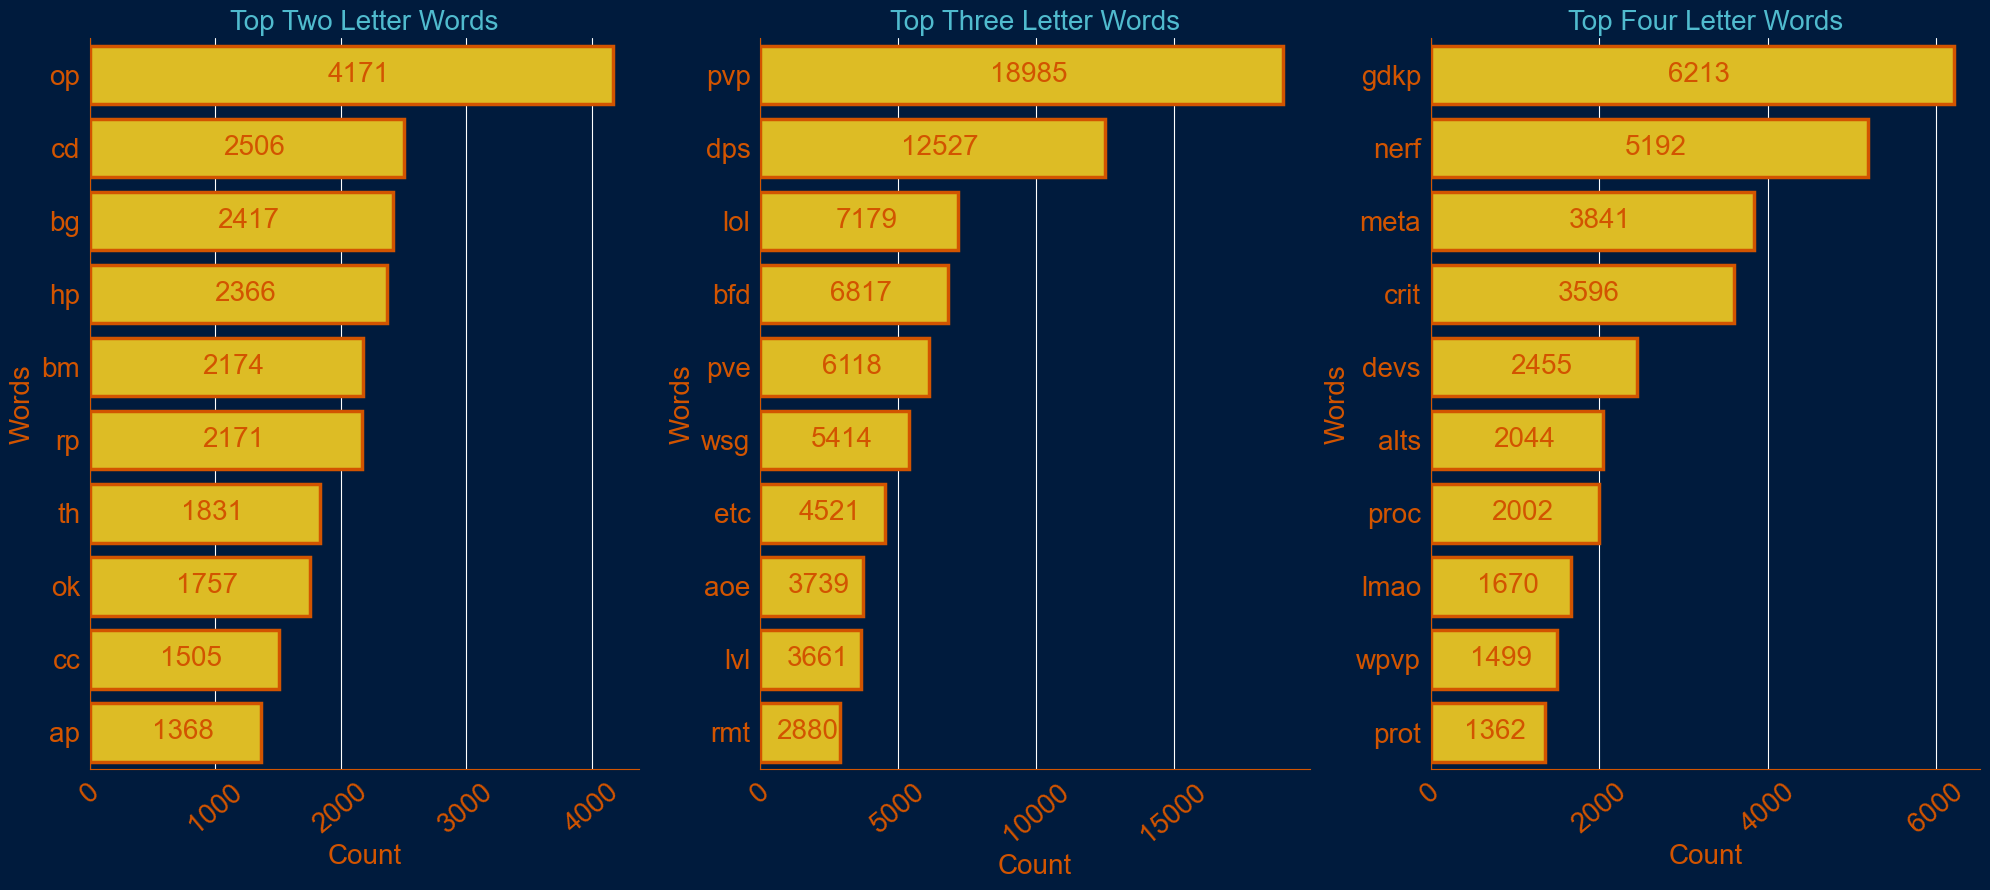

In [36]:
x_col = 'count'
y_col = 'words'
titles = ['Top Two Letter Words',
          'Top Three Letter Words', 'Top Four Letter Words']
bar_colors_sod = [CLASSIC_COLORS['bright_yellow']] * 3
background_colors_sod = [CLASSIC_COLORS['wow_blue']] * 3
glow_colors_sod = [CLASSIC_COLORS['wow_orange']] * 3
title_color_sod = '#50BBCE'
font_size = 20
font_color = CLASSIC_COLORS['wow_orange']
orientation = 'h'


# Instantiate CustomizePlot
plotter = CustomizePlot()

# Call the plotting function
plotter.create_custom_barplots(
    data_list=[sod_two_letters[:10],
               sod_three_letters[:10], sod_four_letters[:10]],
    x_col=x_col,
    y_col=y_col,
    titles=titles,
    bar_colors=bar_colors_sod,
    glow_colors=glow_colors_sod,
    background_colors=background_colors_sod,
    font_color=font_color,
    font_size=font_size,
    title_color=title_color_sod,
    orientation=orientation
)

### Analyzing Acronyms 
Armed with our compendium of relics, we decipher their meanings and usage within the community. This analysis is comparable to consulting the ancient codices of Azeroth, piecing together how these abbreviations shape the narrative and social fabric of the WoW community.


**Two-Letter Words Analysis**

- **OP (Overpowered):** Refers to characters or abilities that possess excessive strength or capabilities, leading to imbalanced gameplay and potential unfair advantages.

- **CD (Cooldown):** A mechanic that imposes a waiting period before a player can reuse an ability or action, ensuring balanced gameplay by preventing the overuse of powerful skills.

- **BG (Battlegrounds):** PvP zones offering various modes, objectives, and maps where players from opposing factions compete against each other.

- **HP (Hit Points):** The measure of a character's health, indicating the amount of damage they can withstand before being defeated.

- **BM (Beast Mastery):** A Hunter specialization focused on taming and training beasts to fight alongside them, emphasizing a strong bond with pets for enhanced combat effectiveness.

- **RP (Role-Play):** The practice of immersing oneself in a character's persona, acting out their interactions and backstory within the game world, often leading to deeper engagement and creativity.

- **CC (Crowd Control):** Techniques used to temporarily disable or limit the actions of enemies, crucial for gaining tactical advantages in combat through stuns, slows, silences, and other debuffs.

- **AP (Attack Power):** A stat determining the damage dealt by a character's physical attacks. Increasing attack power boosts damage output, achievable through better equipment, buffs, and leveling.



**Three-Letter Words Analysis**

- **PvP (Player vs. Player):** Designates a game mode where players engage in combat against each other. This competitive aspect can unfold in battlegrounds, arenas, and specific open-world zones, offering a way for players to measure their combat skills and strategic prowess against fellow adventurers.
  
- **DPS (Damage Per Second):** It serves dual purposes. It refers both to a role focused on dealing damage in group scenarios and a metric gauging the damage output. As a role, DPS players are crucial for their high damage capabilities, and as a metric, it helps in strategizing optimal damage output in various situations.For instance, saying "Everyone should be doing over 100 DPS overall," means that each group member should deal a certain amount of damage.

- **BFD (<a href="https://wowpedia.fandom.com/wiki/Blackfathom_Deeps">Blackfathom Deeps</a>):** An underwater temple that players can raid once they reach level 25 or higher.

- **PvE (Player vs. Environment):** Contrasts with PvP by focusing on combat against computer-controlled enemies. It encompasses a broad range of content, from quests and dungeons to raids, where players test their mettle against the game's AI.

- **WSG (<a href= "https://wowpedia.fandom.com/wiki/Warsong_Gulch">Warsong Gulch</a>):** A battleground featuring a classic capture-the-flag style competition. Teams strategize to capture the enemy's flag while defending their own in a dynamic PvP environment.

- **AOE (Area of Effect):** Abilities target multiple enemies within a specified area, rather than focusing on a single opponent. Spells like the Mage's Blizzard are pivotal for controlling and damaging groups of enemies, especially in dungeons and raids. The game often places limits on AOE abilities to balance gameplay.

- **LVL (Level):** Indicates a character's progression in the game. As players complete quests, defeat enemies, and explore, they gain experience points (XP) to level up, unlocking new abilities and content.

- **RMT (Real Money Trading):** Involves the exchange of in-game items and currency for real-world money. This practice is generally prohibited and violates World of Warcraft's Terms of Service, as it can disrupt the game's economy and fairness.



    
**Four-Letter Words Analysis**
- **GDKP (Gold Dragon Kill Points):** GDKP stands for Gold Dragon Kill Points, a system used in WoW to distribute loot based on participants bidding gold for items. This method has been controversial due to its impact on game dynamics and player interactions. Recently, Blizzard has implemented measures to restrict this practice, aiming to maintain fairness and integrity within the game's economy and social structure.
  
- **Nerf:** In WoW, "nerf" refers to the reduction in effectiveness or power of a particular game element, such as a character class, skill, or item. This is often done by the game developers to balance gameplay and ensure no single element is disproportionately powerful.
  
- **Meta (Most Effective Tactic Available):** In the WoW community, "meta" refers to the strategies, character builds, and equipment that are currently considered the most effective for achieving success, particularly in PvP and PvE scenarios. Players' experiences can be significantly influenced by how closely they adhere to or diverge from the prevailing meta.
  
- **Crit (Critical Strike):** In WoW, a "crit" refers to a critical strike, which is a successful attack or spell that deals significantly more damage than a regular hit. Critical strike chance is a character attribute that players can improve through gear, talents, and buffs.
  
- **Devs (Developers):** In the context of WoW, "devs" refers to the game developers—Blizzard Entertainment's team responsible for creating, maintaining, and updating the game. They play a crucial role in shaping the game's content, mechanics, and overall direction.
  
- **Alts (Alternate Characters):** "Alts" are players' alternate characters, distinct from their primary or main character. Players use alts to experience the game from different perspectives, try out new roles or strategies, or accomplish tasks that benefit their main character.

- **Proc:** In WoW, "proc" is a common term for describing a special weapon, item, or ability effect that activates (or triggers) under specific conditions. The term originates from "special procedure," referring to random or condition-based activation of effects.
  
- **WPVP (World PvP):** WPVP, or World Player versus Player, refers to PvP combat that occurs organically in the game's open world rather than in structured environments like battlegrounds or arenas. It represents the spontaneous, player-initiated battles and skirmishes that occur throughout Azeroth.
  
- **Prot (Protection):** In WoW, "prot" refers to the Protection specialization available to certain classes like Warriors and Paladins. This specialization focuses on tanking—absorbing damage and protecting allies during combat, making it essential for group and raid content.

**Connections**
- **GDKP and RMT** GDKP (Gold Dragon Kill Points) systems are often associated with Real Money Trading (RMT). This association arises because the in-game gold, central to the GDKP system, can be a target for RMT practices. This link has contributed to controversies surrounding GDKP, leading to Blizzard's increased scrutiny and regulatory actions, especially when in-game economies intersect with real-world currency transactions.

- **Nerf to Hunters:** The term "nerf" is frequently associated with Hunters, particularly when discussing their overpowering (OP) status in the early phases of both PvP (Player versus Player) and PvE (Player versus Environment). When Hunters are perceived as too strong, resulting in an imbalance, they become prime candidates for nerfs to restore balance and ensure fair competition and cooperative gameplay.

- **Hunters and the Meta:** Hunters are often central to discussions of the WoW "meta" (Most Effective Tactic Available), especially when they are considered OP (overpowered). Their dominance in certain game phases can dictate the prevailing strategies and character choices, influencing the meta significantly. This dominance leads to a cycle where the meta evolves around the strengths and weaknesses of Hunters, impacting players' experiences and strategic decisions.

- **RP-PVP Server Dynamics:** Role-play (RP) has a unique relationship with RP-PvP environments, where players engage in both character-driven storytelling and competitive combat. Servers like Chaos Bolt have become known for blending intense PvP action with immersive role-playing. This blend allows for a rich narrative experience alongside traditional PvP challenges, linking the creative aspects of RP with the strategic demands of PvP.


These graphs reveal not just the abbreviations themselves but also the priorities and interests of the WoW community during the Season of Discovery. The prevalence of terms related to PvP content, character progression, and game mechanics suggests a community deeply engaged with the competitive and cooperative aspects of WoW. The presence of various abbreviations in WoW's landscape of language highlights the intricate nature of the game's ecosystem and its players' diverse culture. It showcases a community that is not only keenly interested in the mechanics and lore of the game but also actively engages in a shared language that evolves.

## Mastering Sentiment Analysis
In the sprawling Warcraft universe, every quest undertaken, every battle fought, and every interaction within the community pulses with underlying emotions and sentiments. Just as a champion learns to read the signs of the environment and the demeanor of allies and foes alike, sentiment analysis serves as our comprehension charm to decode the emotional undercurrents of the WoW forums. Let's explore how this powerful technique uncovers hidden emotions in texts.

### What is Sentiment Analysis?
In the context of Azeroth, sentiment analysis can be likened to the skill of discerning the morale of a raid team. Just as a leader gauges their team members' confidence, determination, or apprehension before a high-stakes encounter, sentiment analysis examines the words and phrases in forum posts to determine the collective emotional state of the community.

This technique involves **<span style="color:#e268a8; font-style: italic;"><a href="https://www.archon.gg/classic-sod/articles/help/rankings-and-parses" style="text-decoration: none; color: #e268a8;">parsing</a></span>**
 texts to classify statements as positive, negative, or neutral, like identifying whether the chatter before a raid is optimistic, fraught with concern, or simply tactical discussions. By analyzing the language and expressions used by players in discussions, sentiment analysis helps us understand what is being said and the tone and atmosphere that pervades the conversation. 

### The Power of Sentiment Analysis in Azeroth
Applying Sentiment Analysis to the WoW forums resembles casting a spell that reveals the community's emotions. It allows us to:

- Detect shifts in sentiment related to game updates, expansions, or in-game events, similar to sensing a change in the wind that hints at an impending storm or a forthcoming victory.
- Identify the most passionately discussed topics, distinguishing those that unite the community in excitement from those that stir controversy or disappointment, much like recognizing banners that rally troops or the signals that warn of dissent.
- Gauge community morale, offering insights into players' overall satisfaction, frustrations, or hopes in the same way a champion reads the power of their forces.

### Navigating the Emotional Maelstrom 

By harnessing the power of sentiment analysis, we sail the vast sea of discussions in the WoW forums, steering through the riptides of player emotions to uncover the true sentiments that lie beneath. Whether it’s the thrill of exploring new content, the nostalgia for Classic WoW, or the debate over game mechanics, sentiment analysis illuminates the prevailing moods and feelings of the community.

This mystical lens enhances our understanding of the textual content and connects us more deeply with the heart of the WoW community. It empowers us to recognize the ties that bind the players together, celebrating the triumphs, enduring the trials, and always pushing forward in the endless adventure that is World of Warcraft.

These functions are part of a text processing pipeline, each serving a specific role in analyzing text data, from tokenization and cleaning to sentiment analysis and identifying common words. Here's a breakdown of each function's purpose and functionality:
- `tokenize_text`:
   - It concatenates all text entries in the specified column, replacing any NaN values with an empty string to avoid errors during the join operation.
   - The concatenated text is then cleaned using a previously defined `clean_text` function, which likely performs operations such as removing unwanted characters, standardizing whitespace, etc.
   - The cleaned text is converted to lowercase and split into individual words (tokens) based on spaces.

In [37]:
def tokenize_text(df, col):
    # replaces NaN values with an empty string before joining
    text = ''.join(df[col].fillna('').astype(str))
    text = clean_text(text)
    tokens = text.lower().split()
    return tokens

- `remove_stopwords(tokens)`:
    - This function filters out stopwords from a list of tokens. Stopwords are common words that are often removed in the preprocessing phase of text analysis to focus on more meaningful words.
    - The function uses a list of stopwords (`spacy_stopwords`) from the spaCy NLP library—to filter the tokens, returning only those not present in the stopwords list.

In [38]:
def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token not in spacy_stopwords]
    return filtered_tokens

- `analyze_sentiment`:
    - Utilizes the SentimentIntensityAnalyzer from the NLTK library to compute sentiment scores for the input text. The sentiment scores are a dictionary containing measures such as "positive", "negative", "neutral", and "compound" (an aggregate score).
    - This function is useful for gauging the overall sentiment conveyed in a piece of text.

In [39]:
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    # Analyze the sentiment of the text
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores

- `get_top_words(tokens)`:
    - This function counts the frequency of each word in a list of tokens and identifies the top 10 most common words.
    - It uses the `Counter` class from Python's collections module to tally word occurrences and then selects the ten most frequent words.
    - This can be particularly useful for understanding a text corpus's primary topics or focus areas.

In [40]:
def get_top_words(tokens):
    # Count the frequency of each word
    word_counts = Counter(tokens)

    # Identify the top 10 positive words
    top_10_words = word_counts.most_common(10)

    return (top_10_words)

Together, these functions form a comprehensive toolkit for text data preprocessing, sentiment analysis, and extracting key insights from textual content.

`process_text` processes a given set of texts to identify and count the most frequent words, excluding stopwords. It's structured to work with texts that have already been preliminarily cleaned (indicated by the `clean_text` parameter in the `tokenize_text` call). The function:

- Tokenizes the cleaned text to break it down into individual words or tokens.
- Removes common stopwords from the tokens to focus on more meaningful content.
- Determines the top words in the processed text based on frequency.
- Returns a `DataFrame` containing these top words and their respective counts.
  
This function is useful for analyzing the main themes or topics within a corpus by highlighting the most frequently occurring words after applying basic preprocessing steps.

In [41]:
def process_text(texts, text_type):
    tokens = tokenize_text(texts, 'clean_text')
    tokens = remove_stopwords(tokens)
    top_words = pd.DataFrame(data=get_top_words(
        tokens), columns=['word', 'count'])
    return top_words

`analyze_and_prepare_dataframe` performs sentiment analysis on the text contained within a specific column of a `DataFrame` and prepares the `DataFrame` for further analysis by:

- Applying sentiment analysis to each text entry in the specified column yields sentiment scores that quantify the emotional content - of the texts.
- Normalizing these sentiment scores into separate straightforward for easier analysis. This involves extracting the sentiment scores into a format where each component (positive, negative, neutral, compound) is accessible as a separate column in the `DataFrame`.
- Ensuring the `DataFrame` includes a `datetime` index by converting the specified date column to `datetime` format and setting it as the `DataFrame's` index.
- The resulting `DataFrame` combines the original text data with detailed sentiment scores and its index, making it well-suited for time-series analyses or studies examining the relationship between sentiment and temporal factors.

Both functions enhance a text analysis pipeline by facilitating the extraction of meaningful patterns from textual data, whether through frequency analysis of key terms or sentiment analysis and by organizing the data for subsequent steps in the analytical process.

In [42]:
def analyze_and_prepare_dataframe(df, text_column_name, date_column_name):
    df['sentiment_scores'] = df[text_column_name].apply(analyze_sentiment)
    
    # Normalize the sentiment scores to separate columns
    scores = pd.json_normalize(df['sentiment_scores'])
    
    # Concatenate the original DataFrame (minus the 'sentiment_scores' column) with the normalized scores
    final_df = pd.concat([df.drop(columns='sentiment_scores'), scores], axis=1)
    
    # Convert the date column to datetime format and set it as the index
    final_df[date_column_name] = pd.to_datetime(final_df[date_column_name])
    final_df.set_index(date_column_name, inplace=True)
    
    return final_df

In [43]:
# Apply the analyze_sentiment function to each piece of text in the 'text' column of the sod_df DataFrame.
sod_df['sentiment_scores'] = sod_df['text'].apply(analyze_sentiment)

# Convert the list of dictionaries in 'sentiment_scores' into a structured DataFrame where each key becomes a column.
scores_sod = pd.json_normalize(sod_df['sentiment_scores'])

# Combine the original DataFrame (minus the raw sentiment_scores column) with the new structured sentiment scores.
sod_sentiment = pd.concat([sod_df.drop(columns='sentiment_scores'), scores_sod], axis=1)

# Convert the 'date' column to datetime format to enable time series analysis.
sod_sentiment['timestamp'] = pd.to_datetime(sod_sentiment['date'])

# Set the 'timestamp' column as the index of the DataFrame.
sod_sentiment.set_index('timestamp', inplace=True)

# Resample the sentiment data on a weekly basis and calculate the mean for each week.
weekly_sentiment_sod = sod_sentiment[['compound', 'pos', 'neg', 'neu']].resample('W').mean()

# Filter the resampled DataFrame to include only the data from the year 2023 onwards.
filtered_sentiment_sod = weekly_sentiment_sod[weekly_sentiment_sod.index.year >= 2023]

# Drop any rows with NaN values to clean up the data for analysis.
filtered_sentiment_sod.dropna(inplace=True)


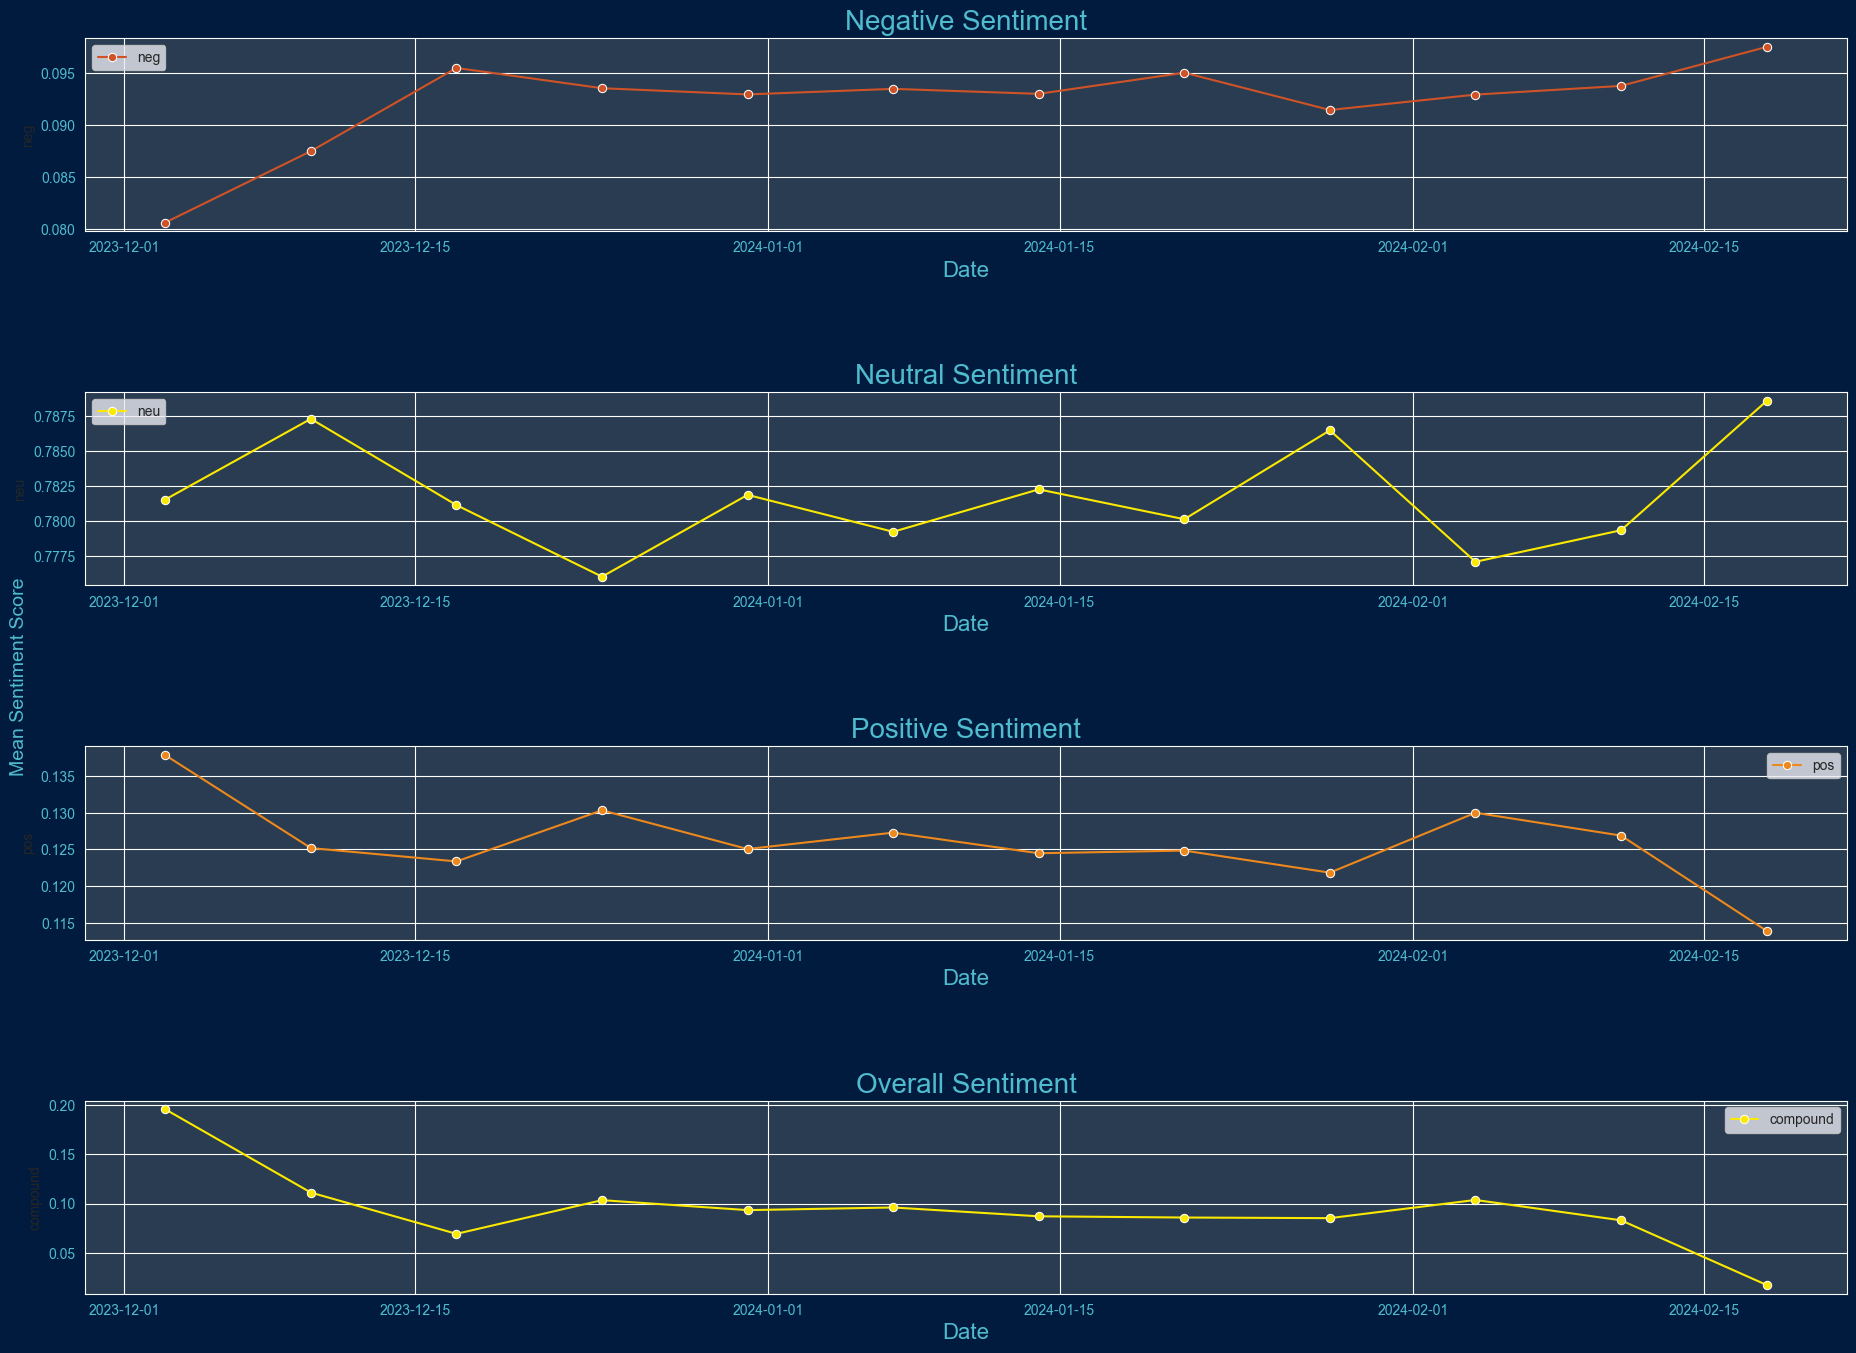

In [44]:
sod_cmap = ['#CF5326','#FBE900','#ED881D','#FBE900']
background_color_sod = CLASSIC_COLORS['wow_blue']
face_color_sod = "#293C51"

sentiments = ['neg', 'neu', 'pos', 'compound']


title_color_sod = '#50BBCE'
edge_color_sod = '#FBE900'

titles = ["Negative Sentiment", "Neutral Sentiment", "Positive Sentiment","Overall Sentiment"]

plotter.plot_sentiment_subplots(filtered_sentiment_sod, sentiments,
                                sod_cmap, face_color_sod, background_color_sod, title_color_sod, titles)

In [45]:
def highlight_cells(val, positive_threshold=0.12, negative_threshold=0.08):
    color = 'black'  # Default text color
    font_weight = 'normal'  # Default font weight
    
    if type(val) == float:  # Check if the value is a float to avoid errors with non-numeric data
        if val >= positive_threshold:
            color = '#0070dd'  # World of Warcraft logo blue
            font_weight = 'bold'  # Make font bold
        elif val <= negative_threshold:
            color = 'red'
            font_weight = 'bold'  # Make font bold
    
    # Return the style string including color and font weight
    return f'color: {color}; font-weight: {font_weight}'


# Applying the styling
filtered_sentiment_sod.index = filtered_sentiment_sod.index.strftime('%Y-%m-%d')
styled_df = filtered_sentiment_sod.style.applymap(highlight_cells, subset=['compound'])

# Display the styled DataFrame
styled_df

,compound,pos,neg,neu
timestamp,,,,
2023-12-03,0.195971,0.137829,0.080666,0.781519
2023-12-10,0.111228,0.125188,0.087519,0.787291
2023-12-17,0.069207,0.123371,0.095507,0.781121
2023-12-24,0.103489,0.130329,0.093560,0.776000
2023-12-31,0.093350,0.125058,0.092964,0.781853
2024-01-07,0.096036,0.127289,0.093498,0.779212
2024-01-14,0.087064,0.124482,0.093019,0.782247
2024-01-21,0.085813,0.124849,0.095049,0.780110
2024-01-28,0.085185,0.121843,0.091470,0.786470


#### **Sentiment Scores Overview**
<hr/>

- **Compound:** A normalized score that ranges from -1 (most negative) to +1 (most positive). It represents the overall sentiment of a text.The negative threshold has been adjusted to mitigate neutral dominance caused by jargon.
- **Pos (Positive):** The proportion of text classified as positive.
- **Neg (Negative):** The proportion of text classified as negative.
- **Neu (Neutral):** The proportion of text classified as neutral.

<hr/>
  
**Weekly Sentiment Trends:**

- **Positive Peaks:** Dates like 2023-12-03 show a relatively higher compound score (0.195971), indicating a more positive sentiment in the community. This could be aligned with positive game events, updates, or community experiences.

- **Stability in Positivity:** Positive sentiment scores fluctuate over the weeks but stay within a relatively stable range. This suggests consistent levels of positive feedback or engagement within the community despite the changes in compound scores.

- **Neutral Dominance:** The neutral scores remain consistently high (around 78-79%) throughout the observed period. This high level of neutrality might indicate a substantial amount of informational or objective discussion, which is neither overtly positive nor negative.

- **Notable Negative Sentiment:** While negative sentiment scores are generally lower than positive scores, they are notable and consistent. Weeks with slightly higher negative scores, like on 2024-02-18, might correspond to community challenges, disagreements, or dissatisfaction with specific aspects of the game or its management.

- **Comparative Analysis:** Comparing the compound scores across weeks reveals subtle shifts in the community's mood. The drop in the compound score during the last observed week suggests a moment of increased negativity or reduced positivity. This happens to be around the time of the latest game update (Released on 2024-02-04).

<hr/>

**Notable Dates:**


- The week of 2023-12-03 shows the highest compound score (0.195971), suggesting the most positive overall sentiment in the observed period. This might coincide with the honeymoon period of the initial release (2023-11-30).
- During the week of February 4th, 2024 (nearing <a href = 'https://worldofwarcraft.blizzard.com/en-us/news/24056979/go-inside-season-of-discovery-phase-2'>phase 2</a> release), the compound score shifted considerably in the negative direction.




<hr/>

The sentiment analysis reveals a complex Azerothian dynamic within the community, characterized by a generally positive outlook punctuated by nuanced fluctuations. Despite a prevailing neutral sentiment, suggesting a community engaged in balanced discourse, it's important to note that this stability is akin to the precarious truce between the **<span style="color:#0070dd; text-shadow: -.3px -.3px 0 #FFD700, .3px -.3px 0 #FFD700, -.3px .3px 0 #FFD700, -.3px .3px 0 #FFD700;">Alliance</span>** and **<span style="color:red ;text-shadow: -0.1px -0.3px 0 #000, 0.3px -0.3px 0 #000, -0.3px 0.3px 0 #000, -0.3px 0.3px 0 #000;">Horde</span>**—fragile and often temporary, holding only in times of dire need. The weekly variations in positive and negative sentiment scores illustrate the community's reactive nature to developments within the game, news, or external factors, echoing the volatile harmony found in Azeroth. This landscape of sentiment, much like the game's lore, underscores that true peace is fleeting, typically emerging only in the face of common threats or shared challenges.

In [46]:
# Categorize sentiment into positive, negative, and neutral
sod_sentiment['Sentiment Category'] = pd.cut(
    sod_sentiment['compound'],
    bins=[-1, -0.01, 0.01, 1],
    labels=['Negative', 'Neutral', 'Positive']
)

# Count the number of each category
sod_sentiment_counts = sod_sentiment['Sentiment Category'].value_counts()

# Convert the Series to DataFrame
sod_sentiment_counts = sod_sentiment_counts.reset_index()

# Rename columns to more descriptive names
sod_sentiment_counts.columns = ['Sentiment Category', 'Count']

In [47]:
pos_texts_sod = sod_sentiment[sod_sentiment['Sentiment Category'] == 'Positive']
neg_texts_sod = sod_sentiment[sod_sentiment['Sentiment Category'] == 'Negative']
neu_texts_sod = sod_sentiment[sod_sentiment['Sentiment Category'] == 'Neutral']

In [48]:
top_pos_words_sod = process_text(pos_texts_sod, 'positive')
top_neg_words_sod = process_text(neg_texts_sod, 'negative')
top_neu_words_sod = process_text(neu_texts_sod, 'neutral')

In [49]:
# Categorize sentiment into positive, negative, and neutral
sod_sentiment['Sentiment Category'] = pd.cut(
    sod_sentiment['compound'], bins=[-1, -0.01, 0.01, 1], labels=['Negative', 'Neutral', 'Positive'])

# Count the number of each category
sentiment_counts_sod = sod_sentiment['Sentiment Category'].value_counts()

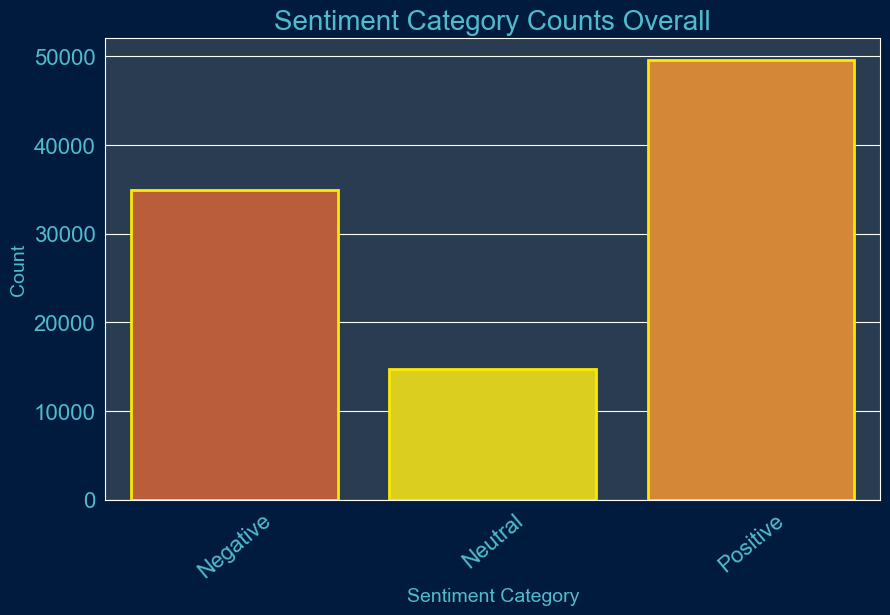

In [50]:
plotter.plot_sentiment_category_counts(
    df=pd.DataFrame(sod_sentiment_counts,columns=['Sentiment Category','Count']).reset_index(),
    title='Sentiment Category Counts Overall',
    x_col='Sentiment Category', 
    y_col='Count', 
    palette=sod_cmap,  
    face_color=face_color_sod, 
    background_color=background_color_sod, 
    edge_color=edge_color_sod, 
    title_color=title_color_sod 
)

In [51]:
sod_sentiment_counts

,Sentiment Category,Count
0,Positive,49601
1,Negative,34948
2,Neutral,14724


### Overall Sentiment Distribution
- **Dominance of Positive Sentiment:** With 49,601 instances classified as positive, it's clear that the overarching sentiment within the WoW community discussions during the period analyzed leans towards the positive. This suggests that, on the whole, players have favorable views or experiences concerning the topics discussed, which could include new game content, community events, or gameplay mechanics introduced in the Season of Discovery.

- **Significant Presence of Negative Sentiment:** The count of 34,948 negative instances, while lower than the positive, is substantial. This indicates that there are significant concerns, criticisms, or areas of dissatisfaction among the community members. These could relate to specific game mechanics, server issues(layering), or aspects of the game's social environment (potentially related to the recent GDKP bans as an attempt to mitigate gold buying/selling and botting).

- **Lower Incidence of Neutral Sentiment:** This category is the least represented, with 14,724 instances classified as neutral. Neutral sentiments typically reflect informational content, questions, or discussions that neither express explicit approval nor disapproval. The relatively lower count suggests that the discussions are more often charged with positive or negative sentiments, indicating a highly engaged and opinionated community.

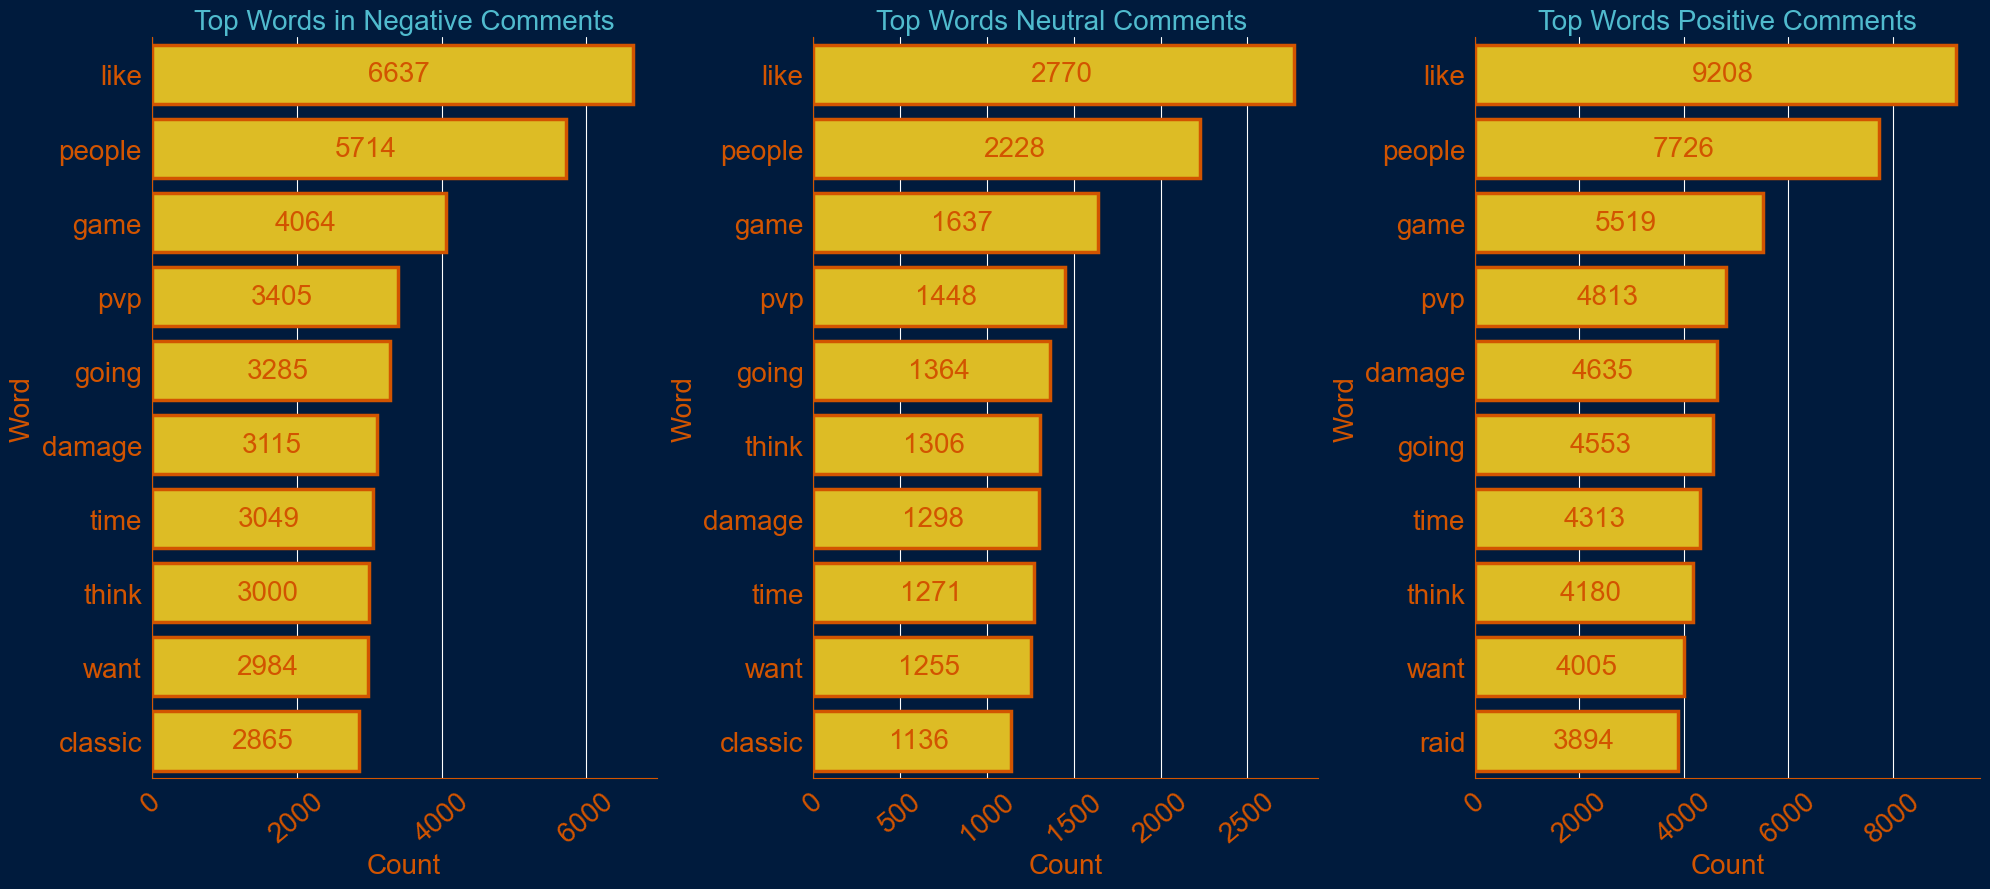

In [52]:
# Instantiate CustomizePlot
plotter = CustomizePlot()
y_col = 'word'
x_col = 'count'
titles = ['Top Words in Negative Comments', 'Top Words Neutral Comments ', 'Top Words Positive Comments']

# Call the plotting function
plotter.create_custom_barplots(
    data_list=[top_neg_words_sod,
               top_neu_words_sod, top_pos_words_sod],
    x_col=x_col,
    y_col=y_col,
    titles=titles,
    bar_colors=bar_colors_sod,
    glow_colors=glow_colors_sod,
    background_colors=background_colors_sod,
    font_color=font_color,
    font_size=font_size,
    title_color=title_color_sod,
    orientation=orientation
)

# Integrated Analysis of WoW Community Discussions
### Overview of Common Themes Across Sentiments
Our sentiment analysis revealed a nuanced emotional territory within the WoW community's discussions over the observed weeks. Words such as "like," "people," "game," "PvP," "going," "damage," "time," "think," and "want" emerged across negative, neutral, and positive sentiments. This indicates their central role in discussions, with their sentiment context influenced by additional content in the text. Notably, the versatility of "like" across all categories underscores its varied use—from expressing agreement and preference to serving as a comparative term.

### Sentiment-Specific Insights
- **Negative Sentiment Analysis:** Keywords like "damage," "time," and "think" often appeared in contexts reflecting game-related frustrations or challenges. Interestingly, "Classic" featured prominently in negative sentiments, hinting at some players' dissatisfaction or critical comparisons with WoW's Classic version.
- **Neutral Sentiment Analysis:** This category used similar terms in more factual or speculative discussions. Terms such as "PvP" and "damage" are likely featured in class-specific discussions, reflecting informative or undecided viewpoints without an emotional bias.
- **Positive Sentiment Analysis:** Positively connoted discussions highlighted enthusiasm or support, with "raid" uniquely marking positive sentiments—suggesting raids as a highlight for many players. Terms like "game" and "PvP" in this light likely denote praise for specific mechanics, updates, or community experiences.
- **Community Engagement:** The recurrence of gameplay mechanics ("PvP," "damage"), social interaction ("people," "like"), and temporal aspects ("time," "going") across sentiments underscores these as focal points of community engagement and discussion.

### Integrating TF-IDF with Sentiment Analysis
TF-IDF analysis brought to light significant terms such as "level 25," "season discovery," "hunter pets," and "dual spec," pinpointing high-interest areas or concerns within the community. Coupled with the frequent use of specific acronyms ("OP" for overpowered, "CD" for cooldown), this analysis reveals compact, focused expressions that signify key discussion points—ranging from gameplay mechanics to content updates.


## Limitations
- TF-IDF analysis faces several challenges when analyzing specialized jargon of niche communities like World of Warcraft (WoW).
- Limitations include lack of contextual awareness, difficulty identifying sentiment, overlooking nuanced language use, evolving language challenges, and difficulty with rare terms.
- Incorporating additional NLP techniques and maintaining an up-to-date understanding of community-specific language is essential to mitigate these limitations.

- Spellchecker method is useful for identifying jargon and acronyms in specialized communities like World of Warcraft.
- However, it has limitations such as limited recognition of context, evolving language and slang, false positives and negatives, and over-reliance on spell checker accuracy.
- It can also be challenging to identify sentiment or importance of the identified terms within the community discussions.
- Additionally, cultural and subcommunity variations can lead to different meanings or significance across groups that the spell-checker method might not capture.

- Sentiment analysis tools may misinterpret community-specific jargon, leading to misclassification of sentiments.
- Jargon unique to a community might result in false sentiment scores, skewing the analysis.
- Defaults on sentiment analysis tools are often set to neutral, potentially masking the true sentiment of discussions.
- Adapting sentiment analysis tools to include community-specific terms and their associated sentiments can significantly enhance accuracy in reflecting true sentiments expressed in community discussions.


**Example**

Terms like "nerf," "buff," and "gank," and acronyms such as "LFG" carry specific sentiments within the WoW community that standard sentiment analysis tools might overlook. For instance, "nerf" typically has a negative connotation, reflecting community displeasure toward weakening aspects of the game.

# Conclusions and Community Dynamics
The amalgamation of TF-IDF results, acronym usage, and sentiment analysis offers a comprehensive view of the WoW community's discourse. It not only elucidates what players discuss (TF-IDF and acronyms) but also how they feel about those topics (sentiment analysis). This integrated approach uncovers the community's discussions during the season, emphasizing the emotional undercurrents and revealing the WoW universe's dynamic and engaged player base.

**Key Takeaways:**

- **Gameplay Mechanics and Community Sentiment:** Terms and acronyms related to gameplay mechanics suggest mixed emotions within the community, reflecting the complexity of player engagement with WoW's evolving content.
- **Content Updates and Player Reaction:** The focus on "season discovery" and similar terms in both TF-IDF and sentiment analysis underlines the community's vested interest and emotional responses to new content, pointing to a vibrant, evolving dialogue around game updates.
- **Community Engagement:** The consistent appearance of certain terms across sentiment categories highlights a deeply engaged community actively participating in a shared language that evolves with the game.

The analyses collectively unveil a comprehensive view of the WoW community's dialogue, highlighting the diverse player experiences, sentiments, and linguistic intricacies that animate this engaged gaming community. By venturing into the **<span style="color:#E73009; text-shadow: 1px 1px 0 #640A02, 1.5px 1.5px 0 #A90F03;"><a href='https://www.wowhead.com/zone=2717/molten-core' style="text-decoration: underline; color: #E73009;">Molten Core</a></span>** of Azeroth—where every player's saga unfolds—we delve into the conversational **<span style="color:#C4945A; text-shadow: 1px 1px 0 #4C0E05, 1.5px 1.5px 0 #4C0E05;"><a href='https://wowwiki-archive.fandom.com/wiki/Caverns_of_Time' style="text-decoration: underline; color: #E69460;">Caverns of Time</a></span>** ,echoing the complex narratives of WoW itself. From tactical confrontations in PvP and collaborative endeavors in raids and dungeons to the formation of alliances within guilds and factions, our insights reflect the ongoing epic of friendship, competition, and exploration at the heart of the World of Warcraft universe. This exploration through the community's discourse is akin to navigating the expansive realms of Azeroth, uncovering not just the conflicts waged or missions pursued but the collective expressions and emotions that unite this virtual realm's inhabitants. As WoW continues to evolve with new expansions and adventures, so too does the community's vernacular and emotional outlook, mirroring the dynamic, ever-evolving essence of Azeroth.


# A Note to **<span style="color:#00ccff ;text-shadow: -0.1px -0.1px 0 #000, 0.1px -0.1px 0 #000, -0.1px 0.1px 0 #000, -0.1px 0.1px 0 #000;">Blizzard</span>**

Acknowledging the perspectives of gamers is essential because it represents a collective intelligence and awareness that can be more advanced than the official recognition provided by game developers. The implementation of the Chaos Bolt server highlights the vital interplay between community insights and developer decisions. It emphasizes the importance of maintaining a close dialogue with the player base, recognizing that the feedback and experiences of players are invaluable in navigating the ever-changing landscape of World of Warcraft. By remaining attuned to the pulse of the community, developers can ensure that their responses to challenges are well-informed and respectful of the players' shared experiences and insights.